<a href="https://colab.research.google.com/github/rifkihanafi421-hub/Project-Data-Science/blob/main/2304140052_Rifki_hanafi_Sentimen_Review_Ulasan_Pengguna_Aplikasi_Sea_Bank_Melalui_Google_Playstore_ipnyb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Scapping Dataset

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews(
    'id.co.bankbkemobile.digitalbank',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=2650             # Jumlah maksimum ulasan yang ingin diambil
)

In [ ]:
import csv

# Ambil hanya list ulasan dari hasil scraping
review_list = scrapreview[0]

# Simpan ke CSV
with open('datamentahseabank.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Header kolom

    for review in review_list:
        writer.writerow([review['content']])  # Ambil isi ulasan


In [ ]:
import pandas as pd
from google.colab import files

# Upload file CSV mentah dari SeaBank
uploaded = files.upload()

# Baca file
# Get the filename of the uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Check the columns in the uploaded DataFrame
print("Columns in uploaded DataFrame:", df.columns)

# Assuming 'content' is the column with review text, select and rename it
# If the column name is different, replace 'content' with the correct column name
if 'content' in df.columns:
    df = df[['content']]
    df.columns = ['ulasan']  # pastikan nama kolom hanya 'ulasan'
elif 'Review' in df.columns:
    # Handle the case if the column is already named 'Review' from a previous save
    df = df[['Review']]
    df.columns = ['ulasan']
else:
    # Handle the case where the expected column is not found
    print(f"Error: Could not find expected column ('content' or 'Review') in {filename}.")
    print("Please check the content of the uploaded CSV file.")
    # You might want to raise an error or exit here if the column is not found
    # raise ValueError("Expected review column not found")


# Daftar kata kunci sentimen
positif_keywords = [
    'mantap', 'bagus', 'cepat', 'top', 'mudah', 'puas', 'oke',
    'mantul', 'suka', 'terbaik', 'recommended', 'keren', 'lancar',
    'praktis', 'helpful', 'simpel', 'baik', 'senang', 'support bagus'
]

negatif_keywords = [
    'error', 'lama', 'buruk', 'gagal', 'tidak bisa', 'lemot', 'jelek',
    'parah', 'mengecewakan', 'susah', 'ribet', 'bug', 'hang', 'crash',
    'tidak responsif', 'sulit login', 'verifikasi gagal', 'lama masuk',
    'fitur hilang', 'saldo hilang', 'tidak sesuai'
]

# Fungsi labelisasi
def label_sentimen(teks):
    teks = str(teks).lower()
    if any(kata in teks for kata in positif_keywords):
        return 'Positif'
    elif any(kata in teks for kata in negatif_keywords):
        return 'Negatif'
    else:
        return None

# Terapkan ke seluruh data
df['label'] = df['ulasan'].apply(label_sentimen)

# Ambil hanya data yang berhasil diberi label Positif / Negatif
df_labeled = df[df['label'].notna()]

# Hitung total masing-masing
summary = df_labeled['label'].value_counts().reset_index()
summary.columns = ['Kelas Sentimen', 'Jumlah']
print("\n📊 Tabel Hasil Labelisasi Positif-Negatif:")
print(summary)

# (Opsional) Simpan hasil rekap ke file CSV
# summary.to_csv('rekap_label_seabank.csv', index=False)
# files.download('rekap_label_seabank.csv') # Commented out download for clarity

Saving datamentahseabank (1) (1).csv to datamentahseabank (1) (1) (2).csv
Columns in uploaded DataFrame: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

📊 Tabel Hasil Labelisasi Positif-Negatif:
  Kelas Sentimen  Jumlah
0        Positif    1806
1        Negatif     299


In [ ]:
import pandas as pd
from google.colab import files

# Upload file CSV mentah dari SeaBank
uploaded = files.upload()

# Baca file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Tampilkan kolom yang ada
print("📋 Kolom dalam data:", df.columns)

# Ambil kolom ulasan (ubah jika namanya berbeda)
if 'content' in df.columns:
    df = df[['content']]
    df.columns = ['ulasan']
elif 'Review' in df.columns:
    df = df[['Review']]
    df.columns = ['ulasan']
else:
    raise ValueError("❌ Kolom 'content' atau 'Review' tidak ditemukan dalam file!")

# Daftar kata kunci sentimen
positif_keywords = [
    'mantap', 'bagus', 'cepat', 'top', 'mudah', 'puas', 'oke',
    'mantul', 'suka', 'terbaik', 'recommended', 'keren', 'lancar',
    'praktis', 'helpful', 'simpel', 'baik', 'senang', 'support bagus'
]

negatif_keywords = [
    'error', 'lama', 'buruk', 'gagal', 'tidak bisa', 'lemot', 'jelek',
    'parah', 'mengecewakan', 'susah', 'ribet', 'bug', 'hang', 'crash',
    'tidak responsif', 'sulit login', 'verifikasi gagal', 'lama masuk',
    'fitur hilang', 'saldo hilang', 'tidak sesuai'
]

# Fungsi labelisasi dengan fallback ke 'Tidak Teridentifikasi'
def label_sentimen(teks):
    teks = str(teks).lower()
    if any(kata in teks for kata in positif_keywords):
        return 'Positif'
    elif any(kata in teks for kata in negatif_keywords):
        return 'Negatif'
    else:
        return 'Tidak Teridentifikasi'

# Terapkan ke seluruh data
df['label'] = df['ulasan'].apply(label_sentimen)

# Hitung total tiap label
summary = df['label'].value_counts().reset_index()
summary.columns = ['Kelas Sentimen', 'Jumlah']

# Tampilkan hasil
print("\n📊 Rekap Label Sentimen (Total Tetap 2.650):")
print(summary)

# (Opsional) Simpan file hasil labelisasi dan rekap
df.to_csv('hasil_labelisasi_2650.csv', index=False)
summary.to_csv('rekap_labelisasi_2650.csv', index=False)
# files.download('rekap_labelisasi_2650.csv')  # Aktifkan jika ingin unduh langsung di Colab


Saving datamentahseabank (1) (1).csv to datamentahseabank (1) (1) (3).csv
📋 Kolom dalam data: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

📊 Rekap Label Sentimen (Total Tetap 2.650):
          Kelas Sentimen  Jumlah
0                Positif    1806
1  Tidak Teridentifikasi     545
2                Negatif     299


#Loading Dataset

In [ ]:
# Mengambil hanya list ulasan (indeks 0) dari hasil scraping
app_reviews_df = pd.DataFrame(scrapreview[0])
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('datamentahseabank.csv', index=False)

In [ ]:
# Membuat DataFrame dari hasil scrapreview, hanya menggunakan daftar ulasan (indeks 0)
app_reviews_df = pd.DataFrame(scrapreview[0])

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [ ]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

reviewId         userName  \
0  2f0f6768-1344-429d-83b1-364cda1f6238  Pengguna Google   
1  f80e9dd3-e53c-4c47-a0a6-1607f15c60f0  Pengguna Google   
2  b525cab2-4699-4142-9114-9c6f8b6c438c  Pengguna Google   
3  517c15df-fbd1-48c5-a784-60d9bf57166c  Pengguna Google   
4  4395ab6a-3950-4e47-9e05-cf470c1029e4  Pengguna Google   

                                                                                                                  userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
3  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
4  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                content  \
0             Asli terpavorit sangat baguss" debeast banget top, bebas iklan, bug ataupun lelet, oke ketika di jalankan aplikasinya dan membuka semua fitur2nya. Tapi sayang juga sih, sering ketika dipakai terkadang agak" susah membukanya pas saat koneksi tidak baik / jaringan jelek, terkadang loadingnya lambat sekali dan cuma berputar-putar saja. akukira cuman hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dgn oke, aplikasinya udah benar-benar cukup membantu sekalii..   
1             Asli berjalan semestinya" debeast banget pokoknya, bebas iklan, bug ataupun lemot, pada saat di jalankan aplikasinya & membuka semua menu2nya. Namun sayang juga ya, sering ketika digunakan terkadang agak" susah membukanya pas saat koneksi lagi buruk / tidak stabil, terkadang loadingnya lambat dan cuman berputar putar saja. aqukira hanya hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dengan mulus, aplikasinya mmberi kenyaman dalam setiap transfer apapun..   
2      Asli luar biasa okelah" debeast bangat gaes, bebas iklan, bug ataupun lemot, baik ketika di jalankan aplikasinya dan membuka semua fitur2nya. Namun sayang juga ya, sering ketika dipakai terkadang agak" susah membukanya pas saat koneksi lagi jelek / tidak stabil, terkadang loadingnya lambat sekali dan cuman berputar putar saja. akukira cuman hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dengan mantul, aplikasinya udah benar benar sudah memberi keaaman terbaik..   
3    puas favorit qu pada saat ini,joslah ,, gak beriklan, tdk ada bug & lemot sehingga nyaman bertransaksi dan menjelajahi setiap detail dari menu"nya. Tetapi disayangkan sekali ada beberapa fitur-menu tsb gak terlalu dipahami/ kegunaannya fungsi dan maksudnya, hanya ada beberapa dr fitur fitur yg aktif digunakan & hampir setiap saat dipake misalanya mengisi listrik, bayar berbayar, transfer, menurut pengalaman semua baik, gak suka pending, sobat" bisa jg transfer tanpa mengeluarkan biaya admin ..   
4  puas bangett mantul betul" cepat kinerjanya, bebas iklan, bug ataupun lemot, lancar ketika dijalankan aplikasinya & membuka semua fitur2nya. Tapi sayang juga ya sering ketika digunakan terkadang agak" susah membukanya pas saat koneksi lagi buruk / tidak stabil, terkadang loadingnya lambat dan cuman berputar putar saja. saya kira hanya hal seperti itu yang biasa terja

In [ ]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2650 non-null   object        
 1   userName              2650 non-null   object        
 2   userImage             2650 non-null   object        
 3   content               2650 non-null   object        
 4   score                 2650 non-null   int64         
 5   thumbsUpCount         2650 non-null   int64         
 6   reviewCreatedVersion  2572 non-null   object        
 7   at                    2650 non-null   datetime64[ns]
 8   replyContent          1193 non-null   object        
 9   repliedAt             1193 non-null   datetime64[ns]
 10  appVersion            2572 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 227.9+ KB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [ ]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 2647
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1128 non-null   object        
 1   userName              1128 non-null   object        
 2   userImage             1128 non-null   object        
 3   content               1128 non-null   object        
 4   score                 1128 non-null   int64         
 5   thumbsUpCount         1128 non-null   int64         
 6   reviewCreatedVersion  1128 non-null   object        
 7   at                    1128 non-null   datetime64[ns]
 8   replyContent          1128 non-null   object        
 9   repliedAt             1128 non-null   datetime64[ns]
 10  appVersion            1128 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 105.8+ KB


In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

#preprocessing

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

reviewId         userName  \
0     2f0f6768-1344-429d-83b1-364cda1f6238  Pengguna Google   
1     f80e9dd3-e53c-4c47-a0a6-1607f15c60f0  Pengguna Google   
6     b8e918bc-aea9-444c-8ca1-6d154eda98b0  Pengguna Google   
7     a423c40e-1158-47b9-b6f8-df1f73a352f3  Pengguna Google   
10    2078558c-ec8a-463f-a5ed-54c4f26ee841  Pengguna Google   
...                                    ...              ...   
2634  48e4d52c-fc44-4d51-b4f0-b2f576bbd5c3  Pengguna Google   
2640  c9c92142-2100-43d8-a0ec-c342bc11e38c  Pengguna Google   
2644  39dac6c9-ac2a-4d14-90d6-ac6414bd8e69  Pengguna Google   
2646  3046e842-8842-4ee0-8159-04f9392cc672  Pengguna Google   
2647  d38f9c3b-b48f-42f2-afd2-b7c22585191b  Pengguna Google   

                                                                                                                     userImage  \
0     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
6     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
7     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
10    https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
...                                                                                                                        ...   
2634  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2640  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2644  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2646  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2647  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   content  \
0                Asli terpavorit sangat baguss" debeast banget top, bebas iklan, bug ataupun lelet, oke ketika di jalankan aplikasinya dan membuka semua fitur2nya. Tapi sayang juga sih, sering ketika dipakai terkadang agak" susah membukanya pas saat koneksi tidak baik / jaringan jelek, terkadang loadingnya lambat sekali dan cuma berputar-putar saja. akukira cuman hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dgn oke, aplikasinya udah benar-benar cukup membantu sekalii..   
1                Asli berjalan semestinya" debeast banget pokoknya, bebas iklan, bug ataupun lemot, pada saat di jalankan aplikasinya & membuka semua menu2nya. Namun sayang juga ya, sering ketika digunakan terkadang agak" susah membukanya pas saat koneksi lagi buruk / tidak stabil, terkadang loadingnya lambat dan cuman berputar putar saja. aqukira hanya hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dengan mulus, aplikasinya mmberi kenyaman dalam setiap transfer apapun..   
6     Asli tervaforit sekali lancar" debest banget ok, bebas iklan, bug ataupun lelet,oke ketika di jalankan aplikasinya dan membuka semua fitur2nya. Namun sayang juga sih, sering ketika

In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
nltk.download('punkt_tab') # Mengunduh dataset yang diperlukan untuk Punkt tokenizer.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

reviewId         userName  \
0     2f0f6768-1344-429d-83b1-364cda1f6238  Pengguna Google   
1     f80e9dd3-e53c-4c47-a0a6-1607f15c60f0  Pengguna Google   
6     b8e918bc-aea9-444c-8ca1-6d154eda98b0  Pengguna Google   
7     a423c40e-1158-47b9-b6f8-df1f73a352f3  Pengguna Google   
10    2078558c-ec8a-463f-a5ed-54c4f26ee841  Pengguna Google   
...                                    ...              ...   
2634  48e4d52c-fc44-4d51-b4f0-b2f576bbd5c3  Pengguna Google   
2640  c9c92142-2100-43d8-a0ec-c342bc11e38c  Pengguna Google   
2644  39dac6c9-ac2a-4d14-90d6-ac6414bd8e69  Pengguna Google   
2646  3046e842-8842-4ee0-8159-04f9392cc672  Pengguna Google   
2647  d38f9c3b-b48f-42f2-afd2-b7c22585191b  Pengguna Google   

                                                                                                                     userImage  \
0     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
6     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
7     https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
10    https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
...                                                                                                                        ...   
2634  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2640  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2644  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2646  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2647  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   content  \
0                Asli terpavorit sangat baguss" debeast banget top, bebas iklan, bug ataupun lelet, oke ketika di jalankan aplikasinya dan membuka semua fitur2nya. Tapi sayang juga sih, sering ketika dipakai terkadang agak" susah membukanya pas saat koneksi tidak baik / jaringan jelek, terkadang loadingnya lambat sekali dan cuma berputar-putar saja. akukira cuman hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dgn oke, aplikasinya udah benar-benar cukup membantu sekalii..   
1                Asli berjalan semestinya" debeast banget pokoknya, bebas iklan, bug ataupun lemot, pada saat di jalankan aplikasinya & membuka semua menu2nya. Namun sayang juga ya, sering ketika digunakan terkadang agak" susah membukanya pas saat koneksi lagi buruk / tidak stabil, terkadang loadingnya lambat dan cuman berputar putar saja. aqukira hanya hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dengan mulus, aplikasinya mmberi kenyaman dalam setiap transfer apapun..   
6     Asli tervaforit sekali lancar" debest banget ok, bebas iklan, bug ataupun lelet,oke ketika di jalankan aplikasinya dan membuka semua fitur2nya. Namun sayang juga sih, sering ketika

In [ ]:
# Misal DataFrame kamu bernama 'data' dan sudah punya kolom 'text_clean'
# Simpan ke file CSV bernama 'seabank_cleaned.csv'

# Mengubah nama variabel dari 'data' menjadi 'clean_df' karena clean_df adalah DataFrame yang ingin disimpan
clean_df.to_csv("seabank_cleaned.csv", index=False, encoding='utf-8')

print("✅ Data cleaned berhasil disimpan ke file 'seabank_cleaned.csv'")

✅ Data cleaned berhasil disimpan ke file 'seabank_cleaned.csv'


In [ ]:
import pandas as pd
from google.colab import files

# Upload file seabank_cleaned
uploaded = files.upload()

# Get the filename of the uploaded file
filename = list(uploaded.keys())[0]

# Baca file CSV cleaned
# Load the cleaned CSV file
df_clean = pd.read_csv(filename)

# Check the columns in the uploaded DataFrame
print("Columns in uploaded DataFrame:", df_clean.columns)

# Select the column containing the final cleaned text ('text_akhir')
# and rename it to 'ulasan' if needed for consistency
if 'text_akhir' in df_clean.columns:
    df_clean = df_clean[['text_akhir']]
    df_clean.columns = ['ulasan']
    print("Successfully loaded and selected 'text_akhir' as 'ulasan'.")
elif 'ulasan' in df_clean.columns:
     # Handle the case if the column is already named 'ulasan'
     df_clean = df_clean[['ulasan']]
     print("Successfully loaded existing 'ulasan' column.")
else:
    # Handle the case where the expected column is not found
    print(f"Error: Could not find expected cleaned text column ('text_akhir' or 'ulasan') in {filename}.")
    print("Please check the content of the uploaded CSV file.")
    # You might want to raise an error or exit here if the column is not found
    # raise ValueError("Expected review column not found")


# Tampilkan jumlah total baris
print("Jumlah total data ulasan bersih:", len(df_clean))

Saving seabank_cleaned (3).csv to seabank_cleaned (3) (1).csv
Columns in uploaded DataFrame: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'text_clean', 'text_casefoldingText',
       'text_slangwords', 'text_tokenizingText', 'text_stopword',
       'text_akhir'],
      dtype='object')
Successfully loaded and selected 'text_akhir' as 'ulasan'.
Jumlah total data ulasan bersih: 1128


In [ ]:
import pandas as pd
from google.colab import files

# Upload file CSV berisi data bersih SeaBank
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Pastikan kolom 'text_clean' tersedia
if 'text_clean' in df.columns:
    df['ulasan'] = df['text_clean']
else:
    raise ValueError("❌ Kolom 'text_clean' tidak ditemukan di file!")

# Daftar kata kunci
positif_keywords = [
    'mantap', 'bagus', 'cepat', 'top', 'mudah', 'puas', 'oke',
    'mantul', 'suka', 'terbaik', 'recommended', 'keren', 'lancar',
    'praktis', 'helpful', 'simpel', 'baik', 'senang', 'support bagus'
]

negatif_keywords = [
    'error', 'lama', 'buruk', 'gagal', 'tidak bisa', 'lemot', 'jelek',
    'parah', 'mengecewakan', 'susah', 'ribet', 'bug', 'hang', 'crash',
    'tidak responsif', 'sulit login', 'verifikasi gagal', 'lama masuk',
    'fitur hilang', 'saldo hilang', 'tidak sesuai'
]

# Fungsi labeling
def label_sentimen(teks):
    teks = str(teks).lower()
    if any(kata in teks for kata in negatif_keywords):
        return 'Negatif'
    else:
        return 'Positif'  # fallback default ke Positif jika tidak ditemukan kata negatif

# Terapkan label
df['label'] = df['ulasan'].apply(label_sentimen)

# Rekap distribusi label
summary = df['label'].value_counts().reset_index()
summary.columns = ['Kelas Sentimen', 'Jumlah']
print("\n📊 Rekap Label Sentimen (Semua 1.083 data, fallback ke Positif):")
print(summary)

# Simpan hasil
df.to_csv("hasil_labeling_full_positif.csv", index=False)
summary.to_csv("rekap_label_full_positif.csv", index=False)
# files.download("rekap_label_full_positif.csv")  # uncomment untuk Colab


Saving seabank_cleaned (3).csv to seabank_cleaned (3) (2).csv

📊 Rekap Label Sentimen (Semua 1.083 data, fallback ke Positif):
  Kelas Sentimen  Jumlah
0        Positif     668
1        Negatif     460


In [ ]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Pastikan kolom 'text_clean' ada
if 'text_clean' not in df.columns:
    raise ValueError("❌ Kolom 'text_clean' tidak ditemukan!")

# Bersihkan data: drop NaN di kolom text_clean
df = df[df['text_clean'].notna()]
print(f"✅ Total data setelah drop NA pada 'text_clean': {len(df)} baris")

# Rename kolom
df['ulasan'] = df['text_clean']

# Kata kunci
positif_keywords = [
    'mantap', 'bagus', 'cepat', 'top', 'mudah', 'puas', 'oke',
    'mantul', 'suka', 'terbaik', 'recommended', 'keren', 'lancar',
    'praktis', 'helpful', 'simpel', 'baik', 'senang', 'support bagus'
]

negatif_keywords = [
    'error', 'lama', 'buruk', 'gagal', 'tidak bisa', 'lemot', 'jelek',
    'parah', 'mengecewakan', 'susah', 'ribet', 'bug', 'hang', 'crash',
    'tidak responsif', 'sulit login', 'verifikasi gagal', 'lama masuk',
    'fitur hilang', 'saldo hilang', 'tidak sesuai'
]

# Fungsi labeling
def label_sentimen(teks):
    teks = str(teks).lower()
    if any(kata in teks for kata in negatif_keywords):
        return 'Negatif'
    return 'Positif'

# Terapkan label
df['label'] = df['ulasan'].apply(label_sentimen)

# Rekap hasil
summary = df['label'].value_counts().reset_index()
summary.columns = ['Kelas Sentimen', 'Jumlah']

# Tampilkan hasil
print("\n📊 Rekap Label Sentimen (Setelah Data Bersih):")
print(summary)
print(f"🔢 Total baris akhir: {len(df)}")

# Simpan file
df.to_csv("hasil_labeling_final.csv", index=False)
summary.to_csv("rekap_labeling_final.csv", index=False)
# files.download("rekap_labeling_final.csv")


Saving seabank_cleaned (3).csv to seabank_cleaned (3) (3).csv
✅ Total data setelah drop NA pada 'text_clean': 1128 baris

📊 Rekap Label Sentimen (Setelah Data Bersih):
  Kelas Sentimen  Jumlah
0        Positif     668
1        Negatif     460
🔢 Total baris akhir: 1128


#Pelabelan

In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    590
negative    538
Name: count, dtype: int64


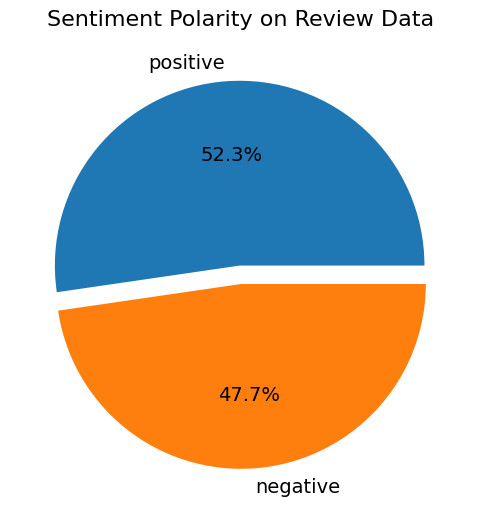

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

Untuk menggambarkan suatu hasil sebaran sentimen pengguna secara visual, harus di lakukan pembuatan diagram pie chart yang berdasarkan nilai polaritas skor positif dan negatif, hasil ini dari data ulasan yang sudah di analisis. Visualisasi ini sangat membantu memberikan pemahaman cepat tentang ke cenderungan opini yang terkandung dalam data.Berikut Hasil output pie chart tersebut menunjukan Sebanyak 52,3% dari data ulasan yang di kategorikan sebagai sentimen positif, lalu 47,7% di kategorikan sebagai sentimen negatif. Dari total 1.128 data hasil nya menunjukan bahwa secara umum pengguna memiliki presepsi yang cenderung positif kepada suatu layanan aplikasi. Walaupun jumlah sentimen negatif cukup signifikan. Visualisasi ini menegaskan bahwa opini pengguna ini tidak mutlak untuk di dominasi oleh satu polaritas, namun seimbang dengan sedikit kecenderungan positif.

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

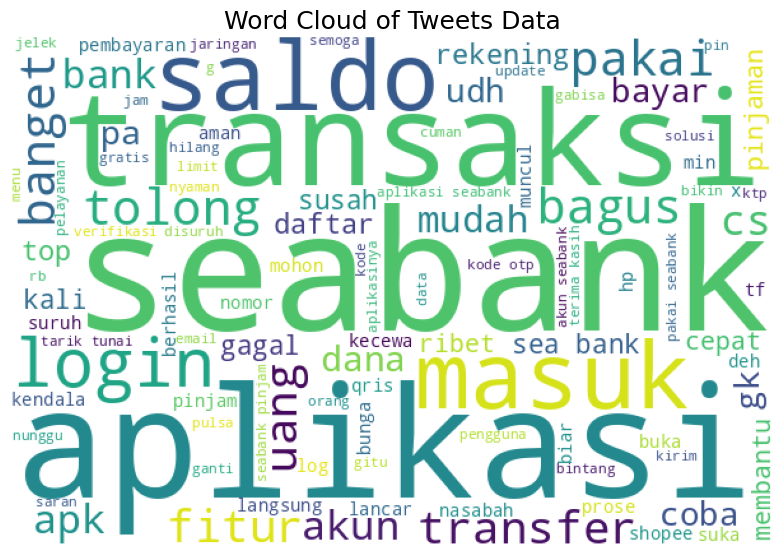

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

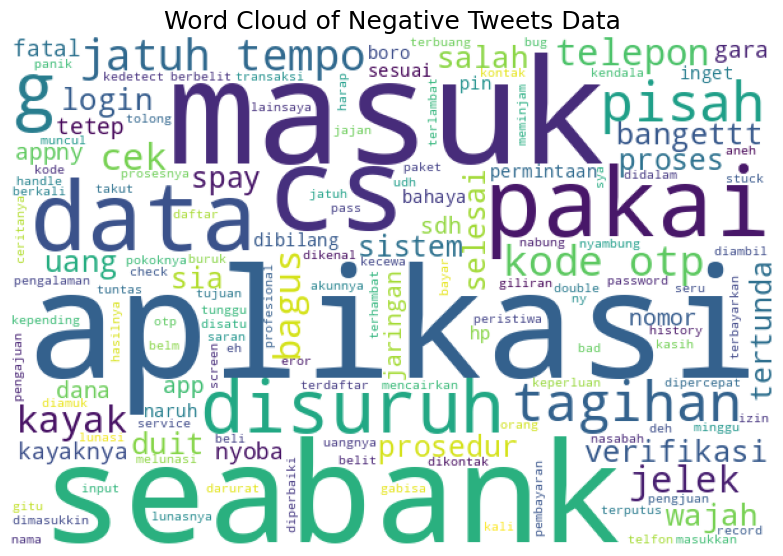

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

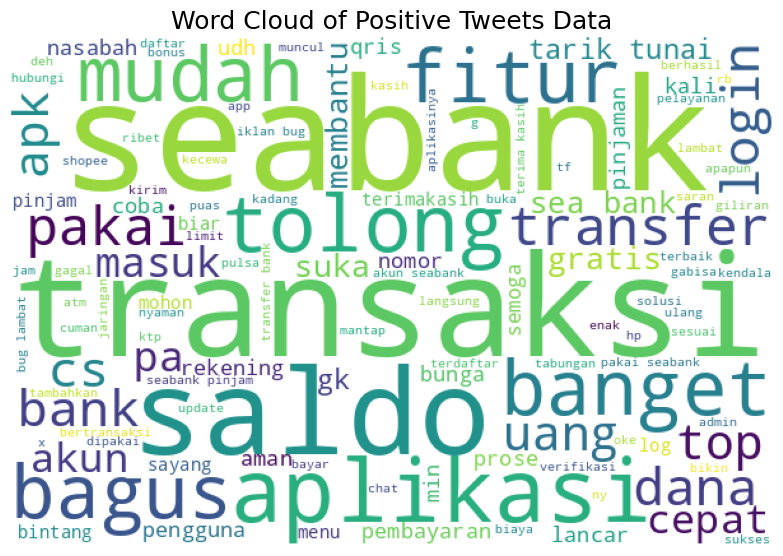

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

Analisis visual melalui word cloud terhadap ulasan pengguna aplikasi SeaBank menunjukkan beberapa kata yang paling sering muncul, baik dalam sentimen positif maupun negatif. Pada word cloud ulasan positif, kata-kata seperti "seabank", "transaksi", "fitur", "mudah", dan "saldo" mendominasi. Ini menunjukkan bahwa banyak pengguna merasa terbantu dengan kemudahan bertransaksi dan mengakses fitur aplikasi. Kata seperti "bagus", "cepat", dan "top" juga mencerminkan kepuasan terhadap layanan yang diberikan.Sebaliknya, word cloud dari sentimen negatif memperlihatkan keluhan yang berpusat pada masalah teknis, seperti kesulitan "masuk", "login", "verifikasi OTP", serta lambatnya tanggapan dari "CS" atau customer service. Kata-kata seperti "disuruh", "kode", dan "telepon" menunjukkan ketidaknyamanan pengguna terhadap prosedur yang dianggap merepotkan atau tidak efisien.Sementara itu, pada word cloud gabungan dari seluruh data, terlihat bahwa topik yang paling banyak dibahas mencakup "aplikasi", "saldo", "transaksi", "masuk", dan "fitur". Ini mengindikasikan bahwa sebagian besar ulasan—baik positif maupun negatif—berfokus pada pengalaman penggunaan aplikasi dan performanya saat melakukan transaksi keuangan.Secara umum, hasil visualisasi ini mendukung pentingnya analisis sentimen untuk memahami aspek apa saja yang dianggap unggul dan mana yang masih perlu ditingkatkan oleh pengembang aplikasi

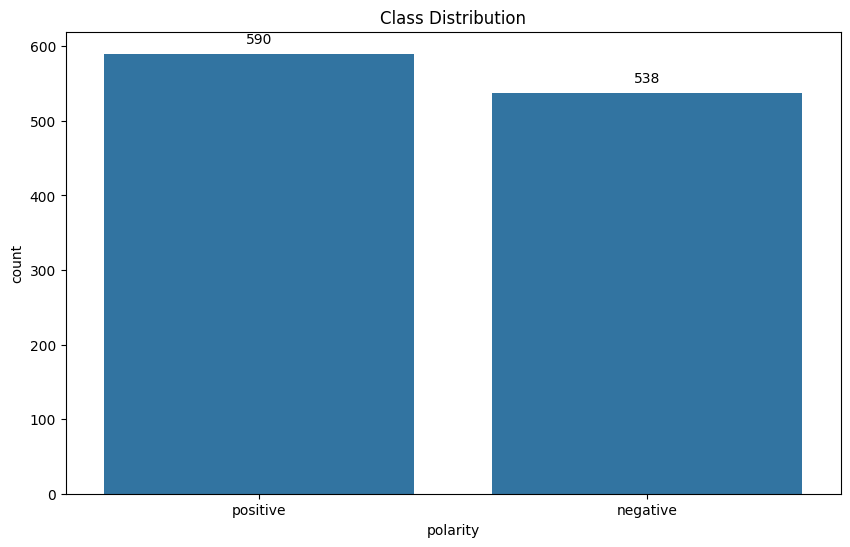

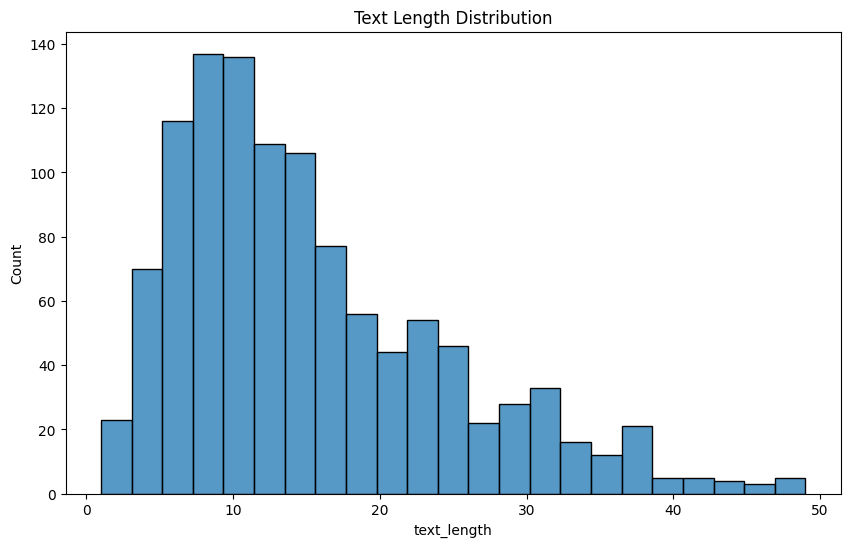

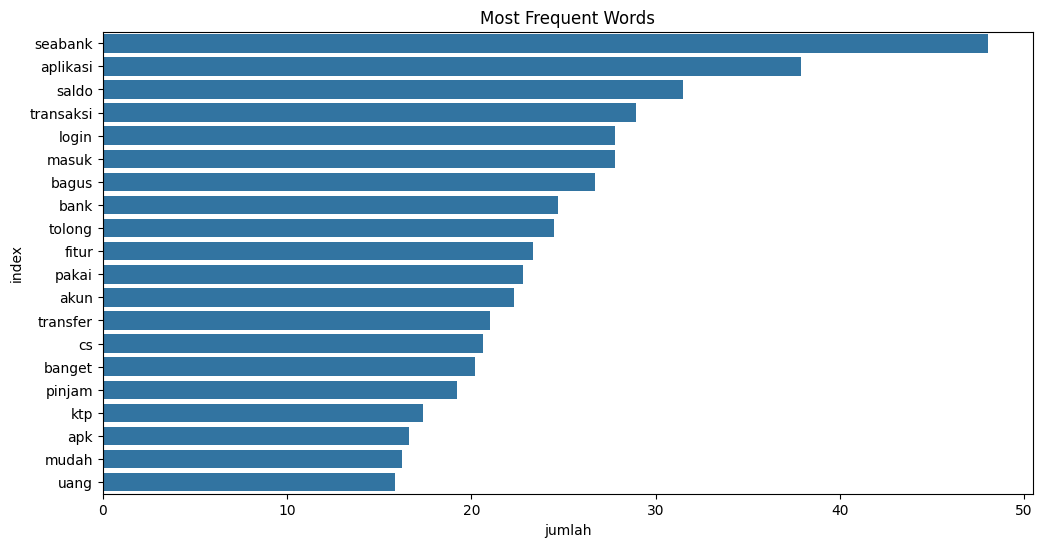

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

Berdasarkan visualisasi distribusi sentimen, terlihat bahwa dari total 1.128 ulasan pengguna aplikasi Sea Bank, sebanyak 590 ulasan tergolong dalam kategori positif, sedangkan 538 ulasan masuk dalam kategori negatif. Selisih antara kedua kelas ini tidak terlalu jauh, yang mengindikasikan bahwa persepsi pengguna terhadap aplikasi ini tergolong seimbang antara kepuasan dan keluhan.Jumlah yang cukup berimbang ini memberikan keunggulan tersendiri bagi proses klasifikasi, karena model pembelajaran mesin dapat bekerja lebih optimal saat distribusi data tidak terlalu timpang. Temuan ini juga menunjukkan bahwa meskipun sebagian besar pengguna memberikan respon positif, masih terdapat proporsi signifikan yang mengungkapkan ketidakpuasan terhadap layanan atau fitur aplikasi.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

#Data Splitting

In [ ]:
clean_df.head(2)

reviewId         userName  \
0  2f0f6768-1344-429d-83b1-364cda1f6238  Pengguna Google   
1  f80e9dd3-e53c-4c47-a0a6-1607f15c60f0  Pengguna Google   

                                                                                                                  userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     content  \
0  Asli terpavorit sangat baguss" debeast banget top, bebas iklan, bug ataupun lelet, oke ketika di jalankan aplikasinya dan membuka semua fitur2nya. Tapi sayang juga sih, sering ketika dipakai terkadang agak" susah membukanya pas saat koneksi tidak baik / jaringan jelek, terkadang loadingnya lambat sekali dan cuma berputar-putar saja. akukira cuman hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dgn oke, aplikasinya udah benar-benar cukup membantu sekalii..   
1  Asli berjalan semestinya" debeast banget pokoknya, bebas iklan, bug ataupun lemot, pada saat di jalankan aplikasinya & membuka semua menu2nya. Namun sayang juga ya, sering ketika digunakan terkadang agak" susah membukanya pas saat koneksi lagi buruk / tidak stabil, terkadang loadingnya lambat dan cuman berputar putar saja. aqukira hanya hal seperti itu yang biasa terjadi di apps ini dan aplikasinya sudah berjalan dengan mulus, aplikasinya mmberi kenyaman dalam setiap transfer apapun..   

   score  thumbsUpCount reviewCreatedVersion                  at  \
0      5             48               3.19.0 2025-05-29 00:16:50   
1      5            293               3.19.0 2025-05-28 11:48:36   

                                                                                                                                                                                                                                                                                                                                               replyContent  \
0  Hi Sobat SeaBank. Mohon maaf atas ketidaknyamanannya. Untuk kendalanya pastikan sudah update Aplikasi SeaBank, jaringan stabil, force close, clear cache, dan instal ulang. Jika masih terkendala kami sarankan hubungi CS SeaBank di nomor 1500130 untuk pengecekan lanjut karena membutuhkan verifikasi data. Semoga kendalanya segera terselesaikan 🙏   
1  Hi Sobat SeaBank. Mohon maaf atas ketidaknyamanannya. Untuk kendalanya pastikan sudah update Aplikasi SeaBank, jaringan stabil, force close, clear cache, dan instal ulang. Jika masih terkendala kami sarankan hubungi CS SeaBank di nomor 1500130 untuk pengecekan lanjut karena membutuhkan verifikasi data. Semoga kendalanya segera terselesaikan 🙏   

            repliedAt appVersion  \
0 2025-05-28 15:35:49     3.19.0   
1 2025-05-28 15:51:15     3.19.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text_clean  \
0   Asli terpavorit sangat baguss debeast banget top bebas iklan bug ataupun lelet oke ketika di jalankan aplikasinya dan membuka 

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

admin     aktif  akun  alasan  aman  aneh    apapun     apk  aplikasi  \
0       0.0  0.000000   0.0     0.0   0.0   0.0  0.000000  0.0000  0.000000   
1       0.0  0.000000   0.0     0.0   0.0   0.0  0.198721  0.0000  0.000000   
2       0.0  0.000000   0.0     0.0   0.0   0.0  0.000000  0.0000  0.000000   
3       0.0  0.000000   0.0     0.0   0.0   0.0  0.000000  0.0000  0.000000   
4       0.0  0.267773   0.0     0.0   0.0   0.0  0.000000  0.0000  0.000000   
...     ...       ...   ...     ...   ...   ...       ...     ...       ...   
1123    0.0  0.000000   0.0     0.0   0.0   0.0  0.000000  0.0000  0.281864   
1124    0.0  0.000000   0.0     0.0   0.0   0.0  0.287239  0.0000  0.299839   
1125    0.0  0.000000   0.0     0.0   0.0   0.0  0.000000  0.0000  0.000000   
1126    0.0  0.000000   0.0     0.0   0.0   0.0  0.000000  0.0000  0.106238   
1127    0.0  0.000000   0.0     0.0   0.0   0.0  0.000000  0.1725  0.241144   

      aplikasinya  ...  topup  transaksi  transfer  tunai  uang  udh  \
0        0.446522  ...    0.0        0.0  0.000000    0.0   0.0  0.0   
1        0.498803  ...    0.0        0.0  0.131119    0.0   0.0  0.0   
2        0.467868  ...    0.0        0.0  0.000000    0.0   0.0  0.0   
3        0.000000  ...    0.0        0.0  0.000000    0.0   0.0  0.0   
4        0.000000  ...    0.0        0.0  0.333578    0.0   0.0  0.0   
...           ...  ...    ...        ...       ...    ...   ...  ...   
1123     0.000000  ...    0.0        0.0  0.000000    0.0   0.0  0.0   
1124     0.240329  ...    0.0        0.0  0.000000    0.0   0.0  0.0   
1125     0.000000  ...    0.0        0.0  0.000000    0.0   0.0  0.0   
1126     0.170306  ...    0.0        0.0  0.000000    0.0   0.0  0.0   
1127     0.000000  ...    0.0        0.0  0.000000    0.0   0.0  0.0   

         ulang  update  verifikasi  wajah  
0     0.000000     0.0         0.0    0.0  
1     0.000000     0.0         0.0    0.0  
2     0.000000     0.0         0.0    0.0  
3     0.000000     0.0         0.0    0.0  
4     0.000000     0.0         0.0    0.0  
...        ...     ...         ...    ...  
1123  0.000000     0.0         0.0    0.0  
1124  0.000000     0.0         0.0    0.0  
1125  0.000000     0.0         0.0    0.0  
1126  0.000000     0.0         0.0    0.0  
1127  0.227198     0.0         0.0    0.0  

[1128 rows x 167 columns]

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

#Pemodelan Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7771618625277162
Naive Bayes - accuracy_test: 0.6991150442477876


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Buat model
naive_bayes = BernoulliNB()

# Latih model
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

# Hitung jumlah prediksi positif dan negatif (pada data uji)
from collections import Counter
sentimen_count = Counter(y_pred_test_nb)

# Menampilkan hasil
print('=== Naive Bayes Evaluation ===')
print('Akurasi pada data latih :', round(accuracy_train_nb, 4))
print('Akurasi pada data uji    :', round(accuracy_test_nb, 4))
print('\nDistribusi Sentimen pada Prediksi Data Uji:')
for label, count in sentimen_count.items():
    print(f"  {label.capitalize()} :", count, "ulasan")


=== Naive Bayes Evaluation ===
Akurasi pada data latih : 0.7772
Akurasi pada data uji    : 0.6991

Distribusi Sentimen pada Prediksi Data Uji:
  Positive : 114 ulasan
  Negative : 112 ulasan


#permodelan svm

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# 1. Melatih model SVM
svm_model = SVC(kernel='linear', probability=True)  # optional: aktifkan probability jika butuh nanti
svm_model.fit(X_train, y_train)

# 2. Prediksi data latih dan uji
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# 3. Hitung akurasi
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

# 4. Hitung distribusi sentimen hasil prediksi data uji
# Deteksi label secara otomatis, apakah 'positive'/'negative' atau 1/0
unique_labels = set(y_pred_test_svm)
label_map = {}

if all(isinstance(label, str) for label in unique_labels):
    label_map = {'positive': 'Positive', 'negative': 'Negative'}
else:
    label_map = {1: 'Positive', 0: 'Negative'}

# Hitung jumlah prediksi untuk tiap label
sentimen_count_svm = Counter(y_pred_test_svm)

# 5. Tampilkan hasil akhir
print('=== SVM Evaluation ===')
print('Akurasi pada data latih :', round(accuracy_train_svm, 4))
print('Akurasi pada data uji    :', round(accuracy_test_svm, 4))
print('\nDistribusi Sentimen pada Prediksi Data Uji:')
for label, count in sentimen_count_svm.items():
    label_display = label_map.get(label, str(label))
    print(f"  {label_display} : {count} ulasan")

# 6. Tambahan evaluasi (jika perlu)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test_svm, target_names=list(label_map.values())))


=== SVM Evaluation ===
Akurasi pada data latih : 0.8603
Akurasi pada data uji    : 0.7257

Distribusi Sentimen pada Prediksi Data Uji:
  Positive : 126 ulasan
  Negative : 100 ulasan

Classification Report:

              precision    recall  f1-score   support

    Positive       0.78      0.66      0.72       118
    Negative       0.68      0.80      0.74       108

    accuracy                           0.73       226
   macro avg       0.73      0.73      0.73       226
weighted avg       0.73      0.73      0.72       226



#permodeln Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

# 1. Buat dan latih model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train.toarray(), y_train)

# 2. Prediksi data latih dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# 3. Akurasi
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

# 4. Deteksi jenis label (angka atau teks)
unique_labels_dt = set(y_pred_test_dt)
label_map_dt = {}

if all(isinstance(label, str) for label in unique_labels_dt):
    label_map_dt = {'positive': 'Positive', 'negative': 'Negative'}
else:
    label_map_dt = {1: 'Positive', 0: 'Negative'}

# 5. Hitung distribusi sentimen hasil prediksi
sentimen_count_dt = Counter(y_pred_test_dt)

# 6. Tampilkan hasil
print('=== Decision Tree Evaluation ===')
print('Akurasi pada data latih :', round(accuracy_train_dt, 4))
print('Akurasi pada data uji    :', round(accuracy_test_dt, 4))
print('\nDistribusi Sentimen pada Prediksi Data Uji:')
for label, count in sentimen_count_dt.items():
    label_display = label_map_dt.get(label, str(label))
    print(f"  {label_display} : {count} ulasan")


=== Decision Tree Evaluation ===
Akurasi pada data latih : 0.9978
Akurasi pada data uji    : 0.677

Distribusi Sentimen pada Prediksi Data Uji:
  Positive : 103 ulasan
  Negative : 123 ulasan


#permodelan knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

# 1. Buat dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.toarray(), y_train)

# 2. Prediksi data latih dan data uji
y_pred_train_knn = knn_model.predict(X_train.toarray())
y_pred_test_knn = knn_model.predict(X_test.toarray())

# 3. Hitung akurasi
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

# 4. Deteksi jenis label (angka atau teks)
unique_labels_knn = set(y_pred_test_knn)
label_map_knn = {}

if all(isinstance(label, str) for label in unique_labels_knn):
    label_map_knn = {'positive': 'Positive', 'negative': 'Negative'}
else:
    label_map_knn = {1: 'Positive', 0: 'Negative'}

# 5. Hitung distribusi sentimen
sentimen_count_knn = Counter(y_pred_test_knn)

# 6. Tampilkan hasil
print('=== KNN Evaluation ===')
print('Akurasi pada data latih :', round(accuracy_train_knn, 4))
print('Akurasi pada data uji    :', round(accuracy_test_knn, 4))
print('\nDistribusi Sentimen pada Prediksi Data Uji:')
for label, count in sentimen_count_knn.items():
    label_display = label_map_knn.get(label, str(label))
    print(f"  {label_display} : {count} ulasan")


=== KNN Evaluation ===
Akurasi pada data latih : 0.6663
Akurasi pada data uji    : 0.5487

Distribusi Sentimen pada Prediksi Data Uji:
  Positive : 188 ulasan
  Negative : 38 ulasan


#mengurutkan hasil akurasi dari tertinggi ke terendah

In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_svm, accuracy_train_knn, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_svm, accuracy_test_knn, accuracy_test_dt]
})

# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)


           Model  Accuracy Test
0    Naive Bayes       0.699115
1            SVM       0.725664
2            KNN       0.548673
3  Decision Tree       0.676991


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


           Model  Accuracy Test
1            SVM       0.725664
0    Naive Bayes       0.699115
3  Decision Tree       0.676991
2            KNN       0.548673


# Prediksi Sentimen dan Rating Ulasan Aplikasi SeaBank: Naive Bayes, SVM, KNN, Decision Tree


In [ ]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ===== 1. Latih Semua Model =====
nb_model = BernoulliNB()
nb_model.fit(X_train.toarray(), y_train)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.toarray(), y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train.toarray(), y_train)

# ===== 2. Prediksi =====
y_pred_nb = nb_model.predict(X_test.toarray())
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test.toarray())
y_pred_dt = dt_model.predict(X_test.toarray())


# Recreate df_test by explicitly joining components based on the test index
df_test = pd.DataFrame({
    'Ulasan': clean_df.loc[y_test.index, 'content'], # Use original content before preprocessing
    'Score': clean_df.loc[y_test.index, 'score'], # Use original score
    'Label_Asli': y_test # y_test already has the correct index and label
})

# Rename 'Score' to 'Rating_Bintang' and potentially add the preprocessed text if needed
# Assuming 'text_clean' is the output of the cleaning step before further steps like stopwords
# If you want the final preprocessed text ('text_akhir'), retrieve that:
df_test['Ulasan_Bersih'] = clean_df.loc[y_test.index, 'text_akhir']
df_test = df_test.rename(columns={
    'Score': 'Rating_Bintang',
    'Ulasan': 'Ulasan_Asli' # Keep original for comparison
})


# ===== 4. Tambahkan hasil prediksi ke dalam DataFrame =====
# Make sure the indices align. y_pred are numpy arrays without index,
# so we need to assign them based on the index of df_test (which came from y_test.index)
df_test['NaiveBayes_Pred'] = y_pred_nb
df_test['SVM_Pred'] = y_pred_svm
df_test['KNN_Pred'] = y_pred_knn
df_test['DecisionTree_Pred'] = y_pred_dt


# ===== 5. Tampilkan kolom penting =====
# Select and reorder columns for final output
hasil_prediksi = df_test[['Ulasan_Bersih', 'Rating_Bintang', 'Label_Asli',
                          'NaiveBayes_Pred', 'SVM_Pred', 'KNN_Pred', 'DecisionTree_Pred']].copy() # Use the cleaned text

# If you prefer the original text in the final output, change 'Ulasan_Bersih' to 'Ulasan_Asli'
# hasil_prediksi = df_test[['Ulasan_Asli', 'Rating_Bintang', 'Label_Asli',
#                           'NaiveBayes_Pred', 'SVM_Pred', 'KNN_Pred', 'DecisionTree_Pred']].copy()


# ===== 6. Cetak 10 baris pertama dan simpan ke CSV =====
print("\n=== Tabel Hasil Prediksi Sentimen dan Rating ===")
print(hasil_prediksi.head(10))

# Simpan ke file jika perlu
hasil_prediksi.to_csv('prediksi_sentimen_dengan_rating.csv', index=False)


=== Tabel Hasil Prediksi Sentimen dan Rating ===
                                                                                                                                                                                                                                              Ulasan_Bersih  \
2535                                                                                                                                                                            seabank tolong gratis tarik tunai setor tunai dikenakan biaya tambahan free   
1975                                                                                                                                                                                                                 sea bank pinjam aplikasi banget nunggu   
1541  x uang hilang uang alasan cs diproses melulu disuruh nungguin xjam hasilnya follow nunggu xjam disuruh nungguin xjam halus nyuruh lupain saldo kirim hilang gitu balikin kacau mah 

# Visualisasi Evaluasi Model Klasifikasi Sentimen: Naive Bayes, SVM, KNN, Decision Tree

=== TABEL PERBANDINGAN MODEL ===


Model  Akurasi Data Latih  Akurasi Data Uji  Ulasan Positif  \
0    Naive Bayes              0.7772              0.69             114   
1            SVM              0.8603              0.72             126   
2            KNN              0.6663              0.54             188   
3  Decision Tree              0.9978              0.67             103   

   Ulasan Negatif  
0             112  
1             100  
2              38  
3             123

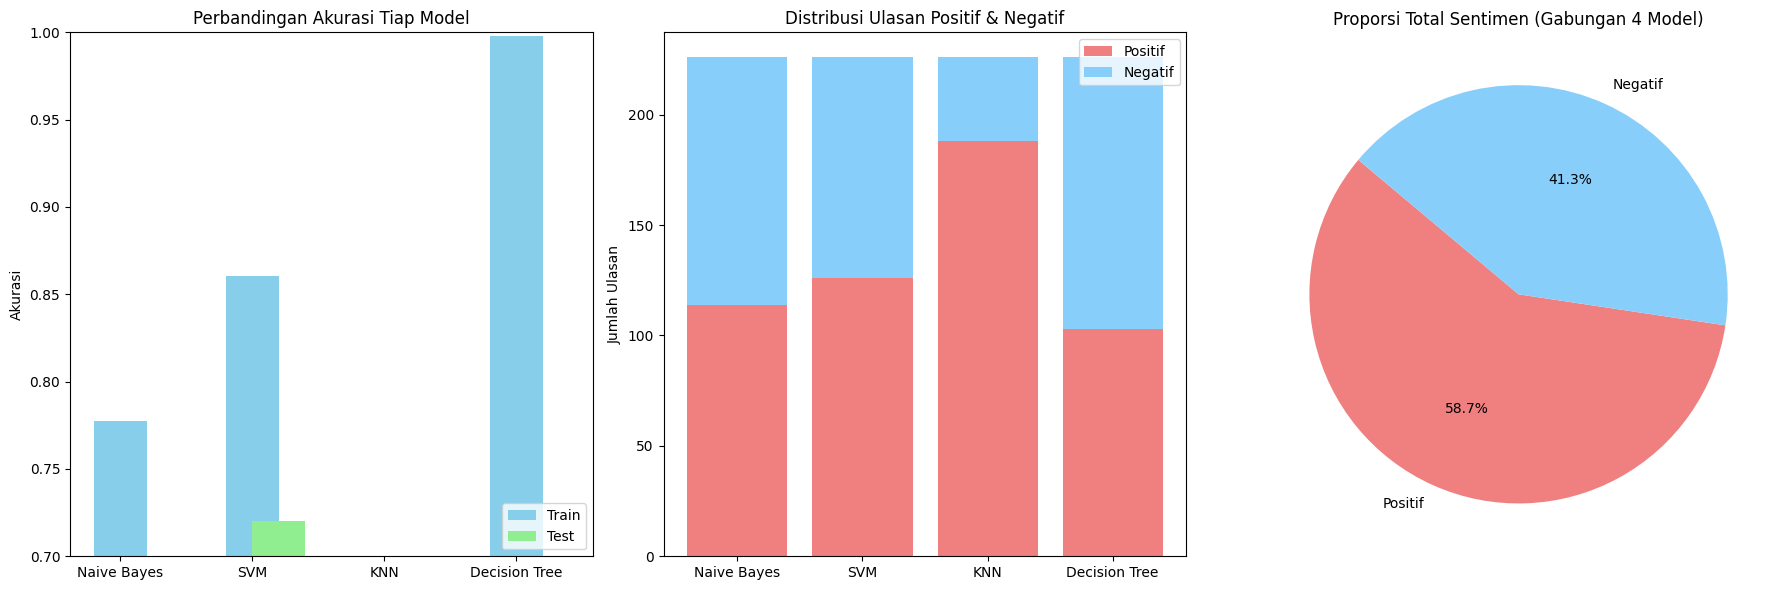

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data hasil evaluasi model
data = {
    'Model': ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
    'Akurasi Data Latih': [0.7772, 0.8603, 0.6663, 0.9978],
    'Akurasi Data Uji': [0.69, 0.72, 0.54, 0.67],
    'Ulasan Positif': [114, 126, 188, 103],
    'Ulasan Negatif': [112, 100, 38, 123]
}

# Buat DataFrame
df = pd.DataFrame(data)

# ===== TAMPILKAN TABEL =====
print("=== TABEL PERBANDINGAN MODEL ===")
display(df)

# ===== VISUALISASI =====
plt.figure(figsize=(18, 6))

# Grafik 1: Bar chart akurasi
plt.subplot(1, 3, 1)
plt.bar(df['Model'], df['Akurasi Data Latih'], width=0.4, label='Train', align='center', color='skyblue')
plt.bar(df['Model'], df['Akurasi Data Uji'], width=0.4, label='Test', align='edge', color='lightgreen')
plt.ylim(0.7, 1.0)
plt.title('Perbandingan Akurasi Tiap Model')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')

# Grafik 2: Bar chart jumlah ulasan
plt.subplot(1, 3, 2)
plt.bar(df['Model'], df['Ulasan Positif'], label='Positif', color='lightcoral')
plt.bar(df['Model'], df['Ulasan Negatif'], bottom=df['Ulasan Positif'], label='Negatif', color='lightskyblue')
plt.title('Distribusi Ulasan Positif & Negatif')
plt.ylabel('Jumlah Ulasan')
plt.legend(loc='upper right')

# Grafik 3: Pie chart total sentimen
plt.subplot(1, 3, 3)
total_positif = df['Ulasan Positif'].sum()
total_negatif = df['Ulasan Negatif'].sum()
plt.pie([total_positif, total_negatif],
        labels=['Positif', 'Negatif'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue'],
        startangle=140)
plt.title('Proporsi Total Sentimen (Gabungan 4 Model)')

# Tampilkan semua grafik
plt.tight_layout()
plt.show()


Hasil perbandingan akurasi menunjukkan bahwa model Decision Tree memperoleh skor tertinggi pada data pelatihan sebesar 99,78%, disusul oleh SVM (86,03%), Naive Bayes (77,72%), dan KNN (66,63%). Namun, pada pengujian data baru, SVM justru mencatat akurasi terbaik sebesar 72%, sementara Decision Tree menurun signifikan ke 67%, Naive Bayes ke 69%, dan KNN ke 54%. Selisih besar antara akurasi latih dan uji pada Decision Tree mengindikasikan adanya overfitting. Dari sisi prediksi sentimen, model KNN cenderung memberikan hasil yang tidak seimbang dengan lebih banyak mengklasifikasikan ulasan sebagai positif (188 positif dan hanya 38 negatif). Sebaliknya, Naive Bayes dan Decision Tree menunjukkan distribusi yang relatif merata, sedangkan SVM sedikit lebih condong ke sentimen positif dengan 126 ulasan positif dan 100 negatif. Secara keseluruhan, proporsi total klasifikasi dari keempat model memperlihatkan bahwa 58,7% ulasan bersifat positif dan 41,3% negatif. Ini mencerminkan bahwa mayoritas pengguna aplikasi Sea Bank menyampaikan pengalaman yang positif, meskipun ulasan negatif juga masih cukup signifikan.

#Perbandingan Akurasi Model dengan n-gram = 1 dan n-gram = 2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Fungsi evaluasi model untuk n-gram tertentu
def evaluate_models(ngram):
    vectorizer = TfidfVectorizer(ngram_range=(ngram, ngram), max_features=3000)
    X = vectorizer.fit_transform(clean_df['text_clean'])
    y = clean_df['polarity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = {}

    # Naive Bayes
    nb_model = BernoulliNB()
    nb_model.fit(X_train.toarray(), y_train)
    results['Naive Bayes'] = accuracy_score(y_test, nb_model.predict(X_test.toarray()))

    # SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    results['SVM'] = accuracy_score(y_test, svm_model.predict(X_test))

    # KNN
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train.toarray(), y_train)
    results['KNN'] = accuracy_score(y_test, knn_model.predict(X_test.toarray()))

    # Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train.toarray(), y_train)
    results['Decision Tree'] = accuracy_score(y_test, dt_model.predict(X_test.toarray()))

    return results

# Jalankan untuk n=1 dan n=2
results_n1 = evaluate_models(1)
results_n2 = evaluate_models(2)

# Gabungkan hasil ke dalam DataFrame
comparison_df = pd.DataFrame({
    'n=1': results_n1,
    'n=2': results_n2
}).T

comparison_df.columns.name = "Model"
comparison_df.index.name = "N-Gram"
comparison_df = comparison_df.round(4)

# Tampilkan hasil perbandingan
print("=== Perbandingan Akurasi Model dengan n-gram = 1 dan n-gram = 2 ===")
display(comparison_df)


=== Perbandingan Akurasi Model dengan n-gram = 1 dan n-gram = 2 ===


Model   Naive Bayes     SVM     KNN  Decision Tree
N-Gram                                            
n=1          0.6903  0.7434  0.6106         0.6416
n=2          0.6549  0.6460  0.5265         0.5354

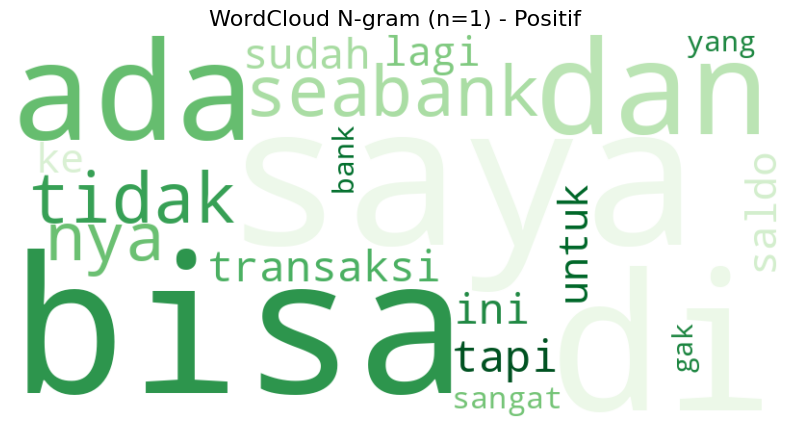

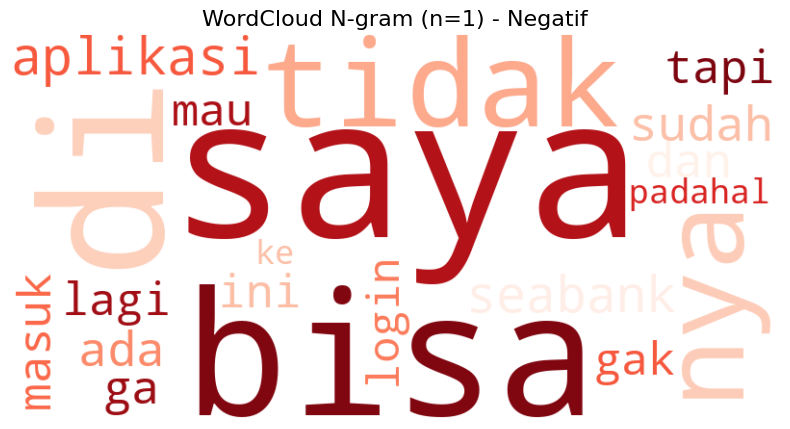

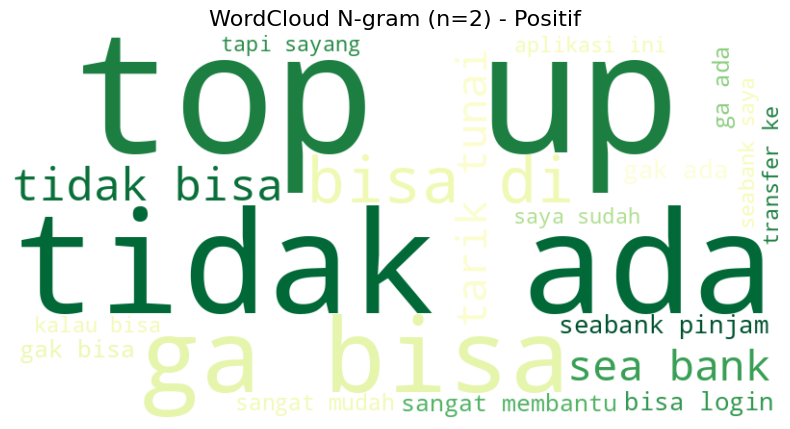

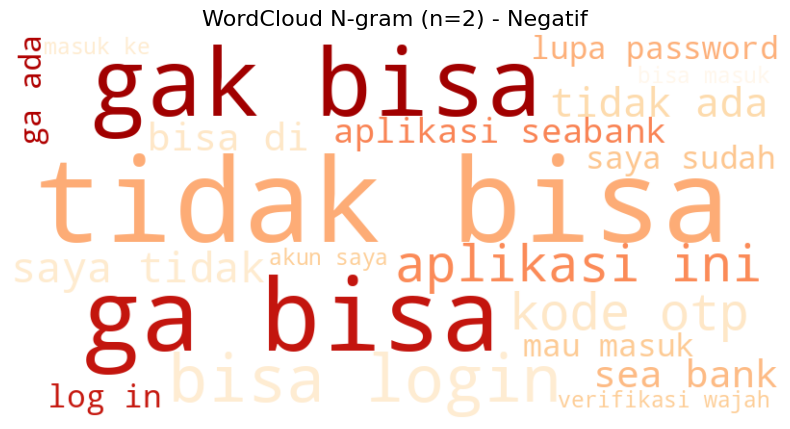

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def top_ngrams(corpus, ngram_range=(1, 1), top_k=20):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=3000)
    X = vectorizer.fit_transform(corpus)
    scores = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    tfidf_scores = dict(zip(vocab, scores))
    sorted_tfidf = dict(sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:top_k])
    return sorted_tfidf

def plot_wordcloud(tfidf_dict, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap)
    wordcloud.generate_from_frequencies(tfidf_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Filter ulasan positif dan negatif
pos_text = clean_df[clean_df['polarity'] == 'positive']['text_clean'].astype(str)
neg_text = clean_df[clean_df['polarity'] == 'negative']['text_clean'].astype(str)

# ===== N-GRAM = 1 (Unigram) =====
top_pos_n1 = top_ngrams(pos_text, ngram_range=(1, 1))
top_neg_n1 = top_ngrams(neg_text, ngram_range=(1, 1))

plot_wordcloud(top_pos_n1, "WordCloud N-gram (n=1) - Positif", "Greens")
plot_wordcloud(top_neg_n1, "WordCloud N-gram (n=1) - Negatif", "Reds")

# ===== N-GRAM = 2 (Bigram) =====
top_pos_n2 = top_ngrams(pos_text, ngram_range=(2, 2))
top_neg_n2 = top_ngrams(neg_text, ngram_range=(2, 2))

plot_wordcloud(top_pos_n2, "WordCloud N-gram (n=2) - Positif", "YlGn")
plot_wordcloud(top_neg_n2, "WordCloud N-gram (n=2) - Negatif", "OrRd")


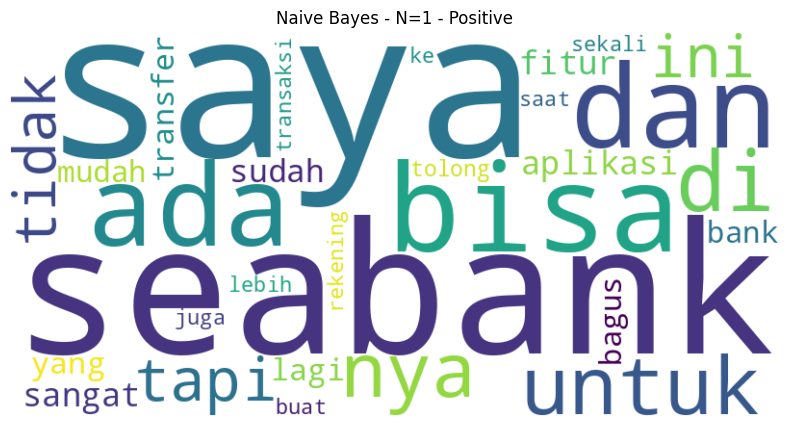

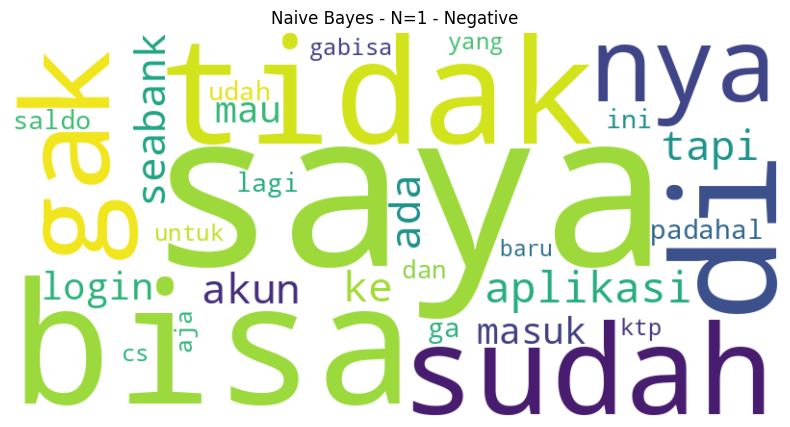

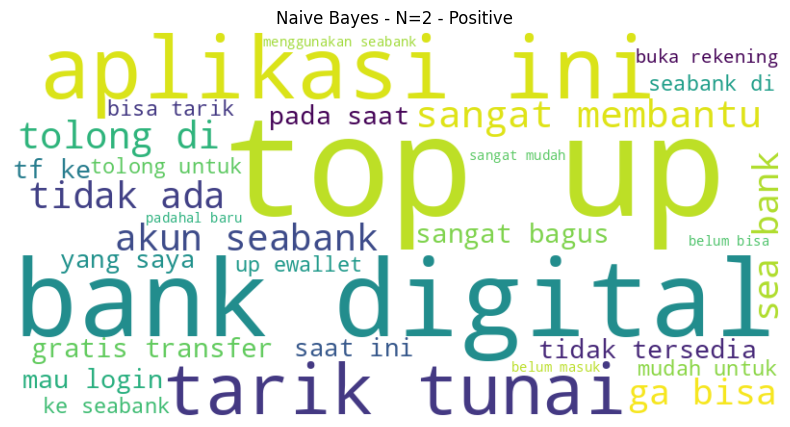

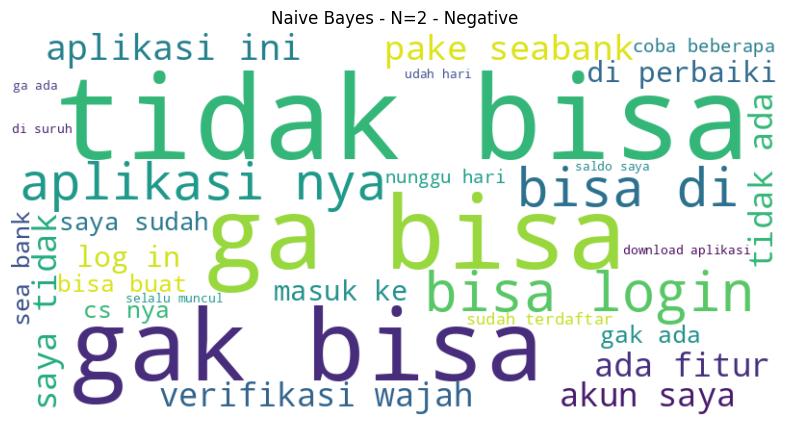

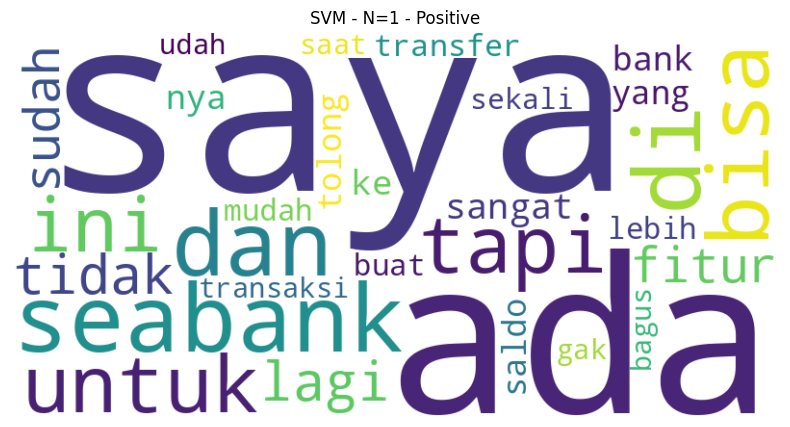

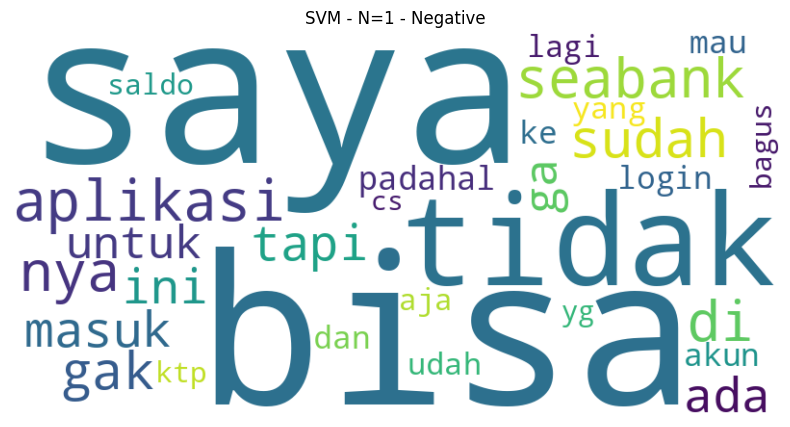

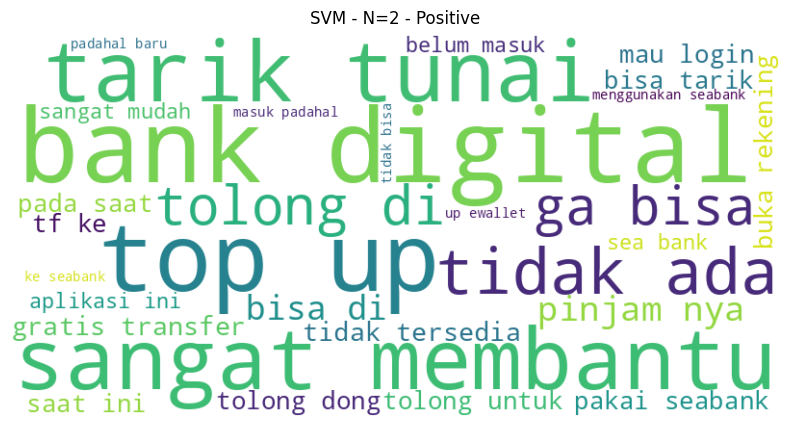

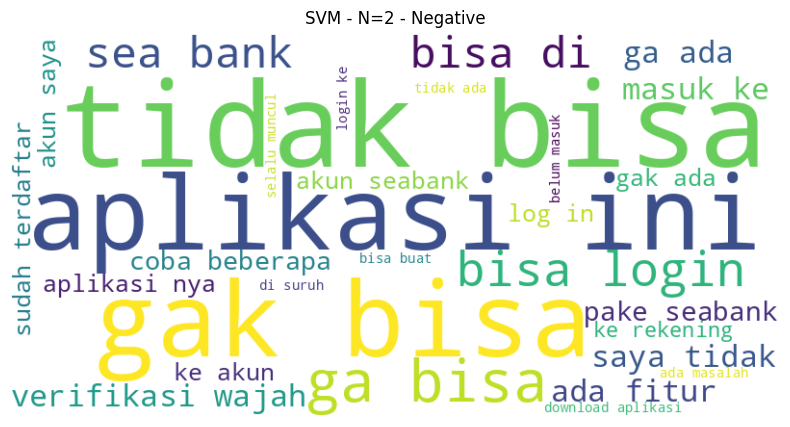

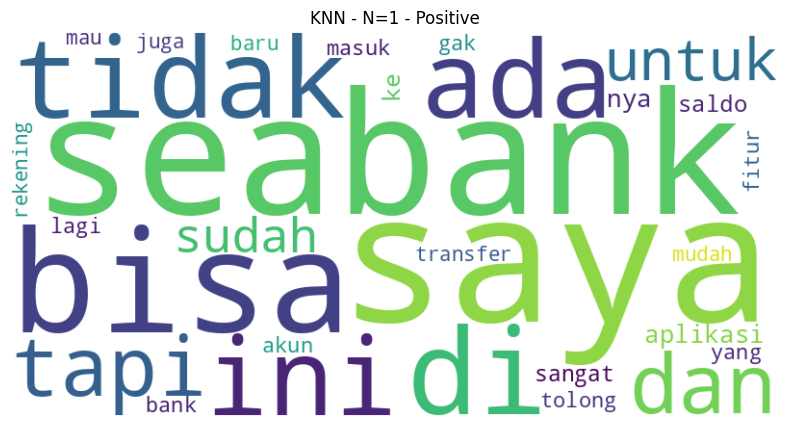

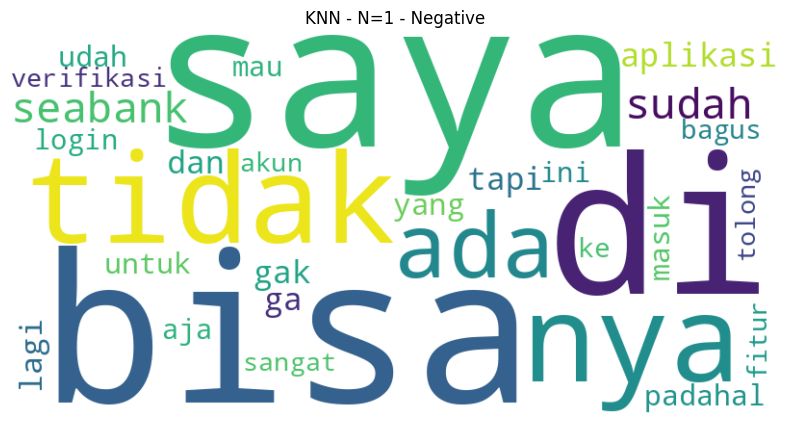

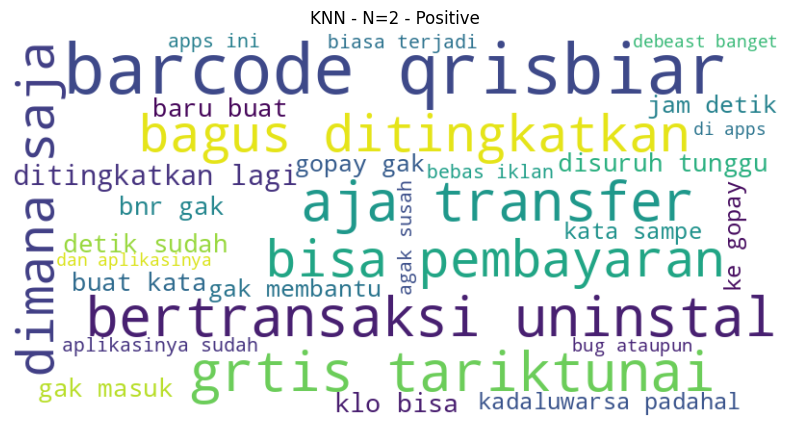

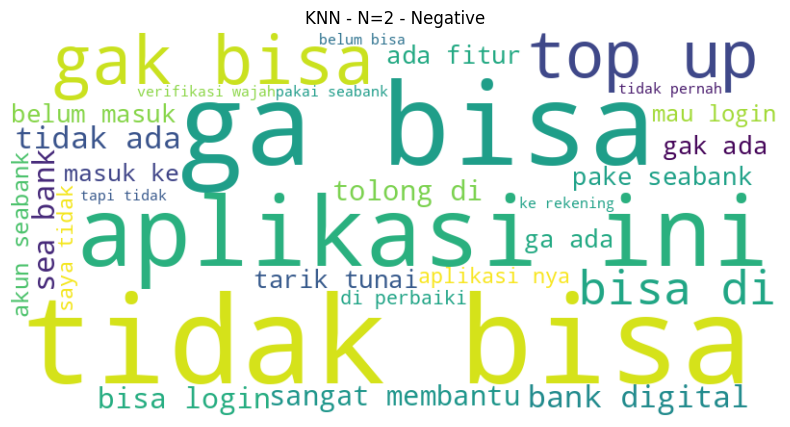

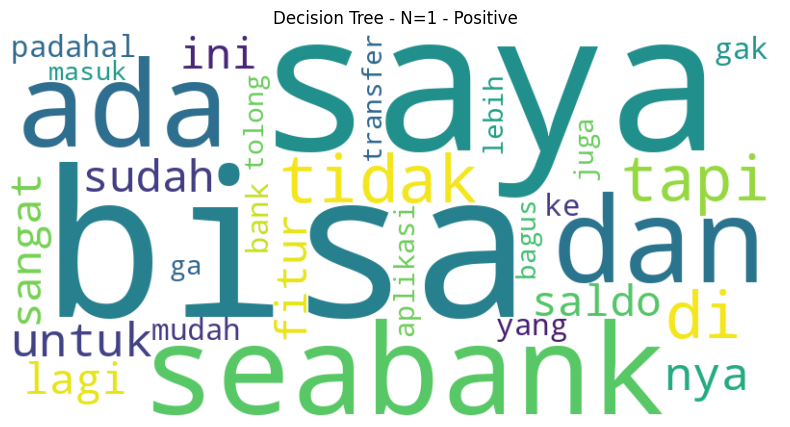

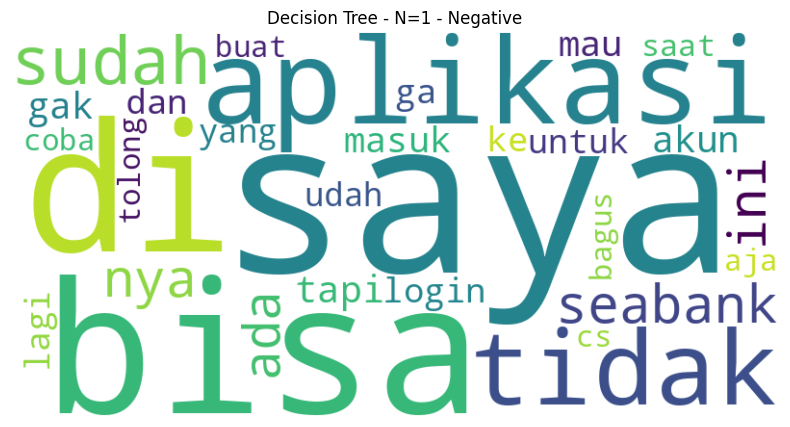

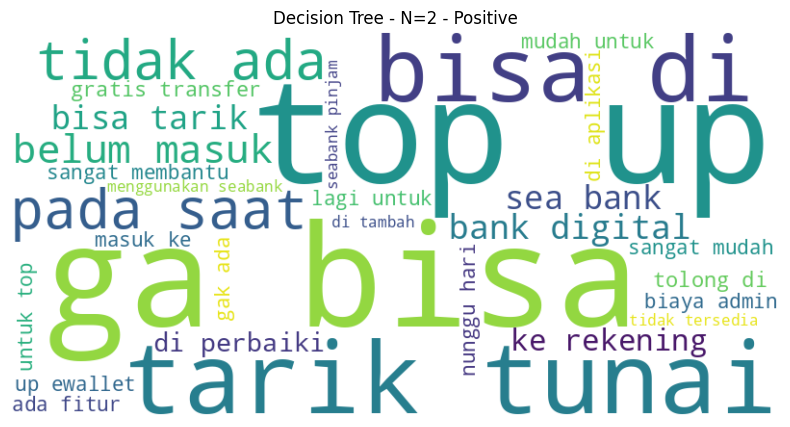

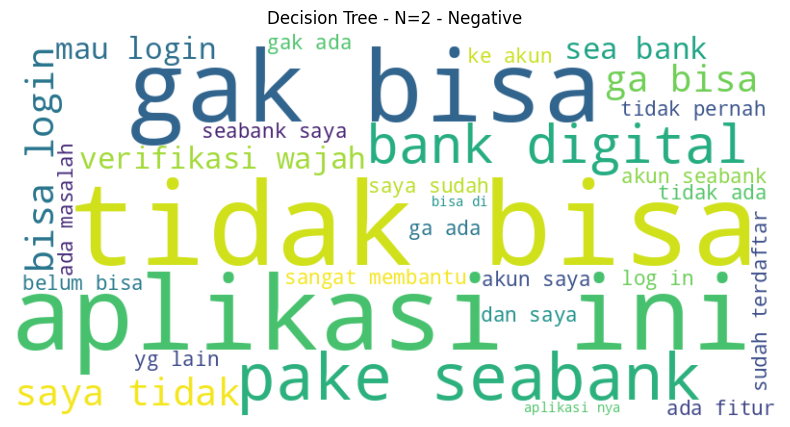

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# === Fungsi: WordCloud berdasarkan prediksi model ===
def generate_ngram_wordcloud(model_name, ngram_range, X_test_texts, y_pred):
    df = pd.DataFrame({
        'text': X_test_texts,
        'sentiment': y_pred
    })

    for sentiment in ['positive', 'negative']:
        corpus = df[df['sentiment'] == sentiment]['text']
        if corpus.empty:
            continue

        vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=100)
        # Handle potential errors during fit_transform on empty corpus
        try:
            tfidf = vectorizer.fit_transform(corpus)
            scores = tfidf.sum(axis=0).A1
            vocab = vectorizer.get_feature_names_out()
            tfidf_scores = dict(zip(vocab, scores))
            top_scores = dict(sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:30])

            wc = WordCloud(width=800, height=400, background_color='white')
            wc.generate_from_frequencies(top_scores)
            plt.figure(figsize=(10, 5))
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"{model_name} - N={ngram_range[0]} - {sentiment.capitalize()}")
            plt.show()
        except ValueError as e:
            print(f"Could not generate WordCloud for {model_name} {sentiment} N={ngram_range[0]}: {e}")
            continue


# === Loop: Model dan N-Gram ===
models = {
    'Naive Bayes': BernoulliNB(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# Split the clean_df before vectorization to get corresponding text data
X_text = clean_df['text_clean'] # Use the clean text column
y = clean_df['polarity']

# Perform the split on the text data first to maintain alignment
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y) # Added stratify for better class distribution

for model_name, model in models.items():
    for n in [1, 2]:
        vec = TfidfVectorizer(ngram_range=(n, n), max_features=3000)

        # Fit and transform only the training text data
        X_train_vec = vec.fit_transform(X_train_text)

        # Transform the test text data using the *same* vectorizer
        X_test_vec = vec.transform(X_test_text)

        # Now train and predict using the vectorized data
        if model_name in ['Naive Bayes', 'KNN', 'Decision Tree']:
            # BernoulliNB, KNN, Decision Tree usually expect dense arrays
            model.fit(X_train_vec.toarray(), y_train)
            y_pred = model.predict(X_test_vec.toarray())
        else:
            # SVC can handle sparse matrices
            model.fit(X_train_vec, y_train)
            y_pred = model.predict(X_test_vec)

        # Pass the actual test text data (X_test_text) to the wordcloud function
        generate_ngram_wordcloud(model_name, (n, n), X_test_text.values, y_pred)

#Analisis Performa dan Visualisasi N-Gram Sentimen Menggunakan Naive Bayes, SVM, KNN, dan Decision Tree"

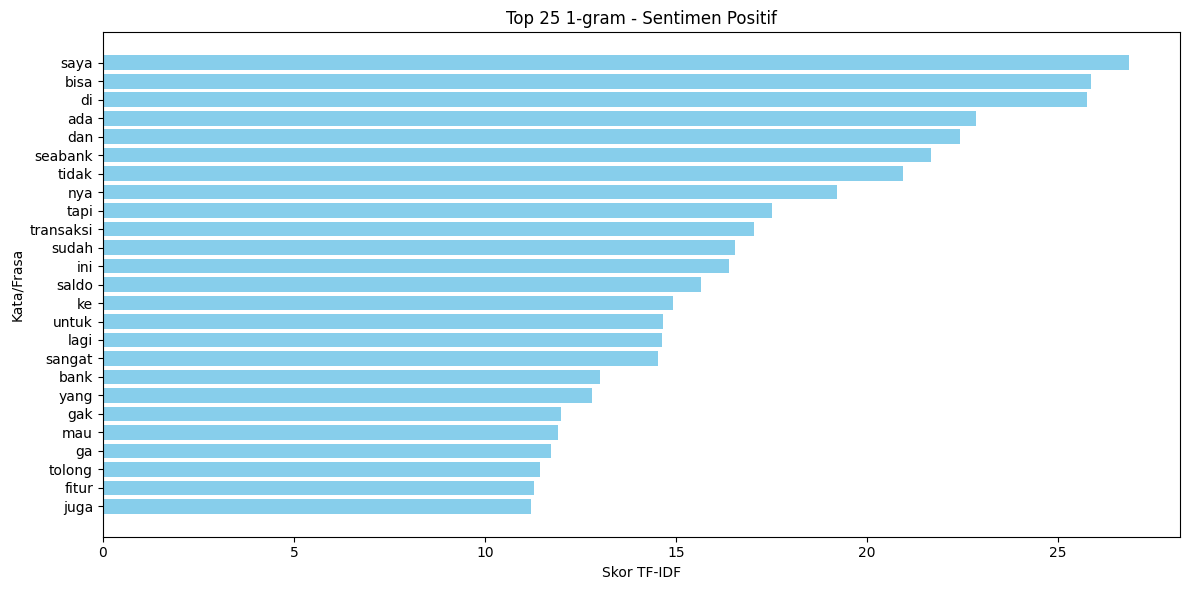

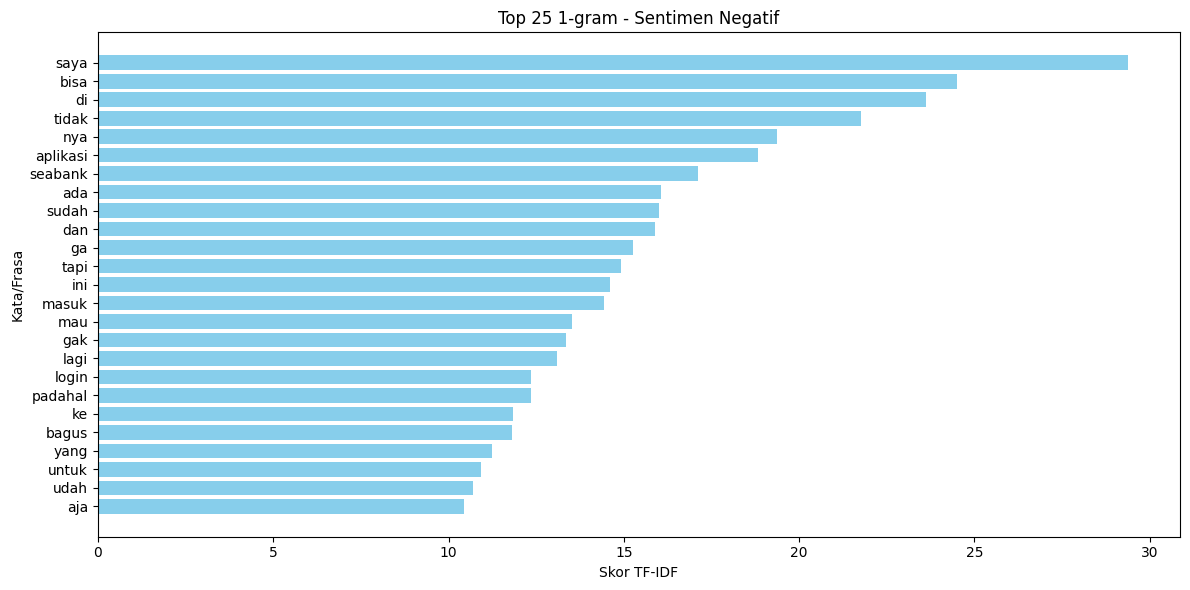

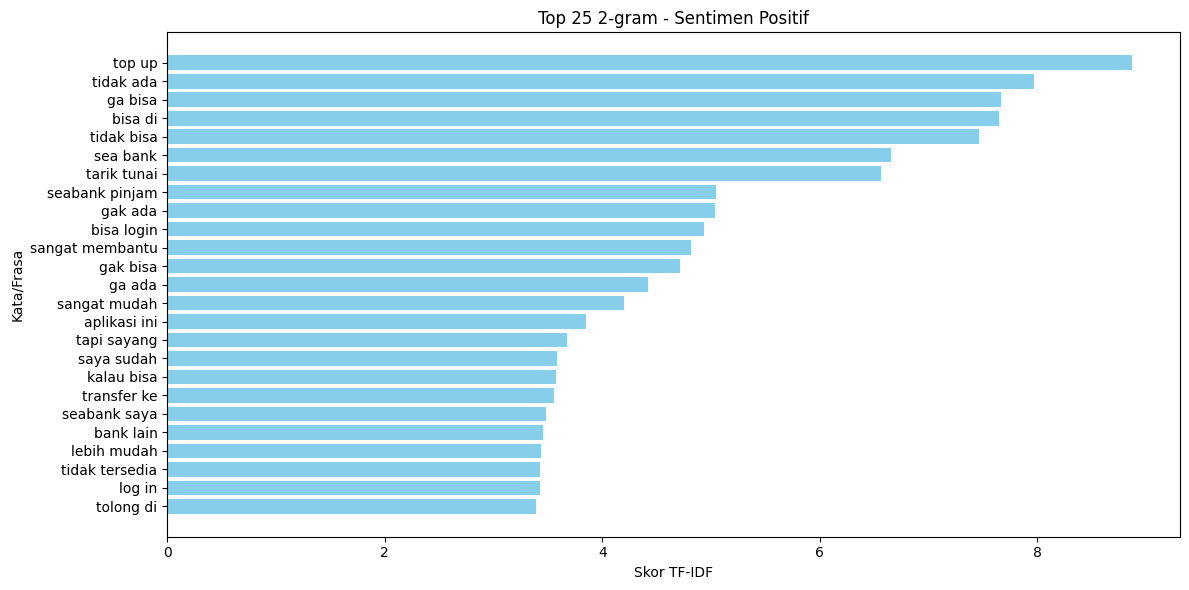

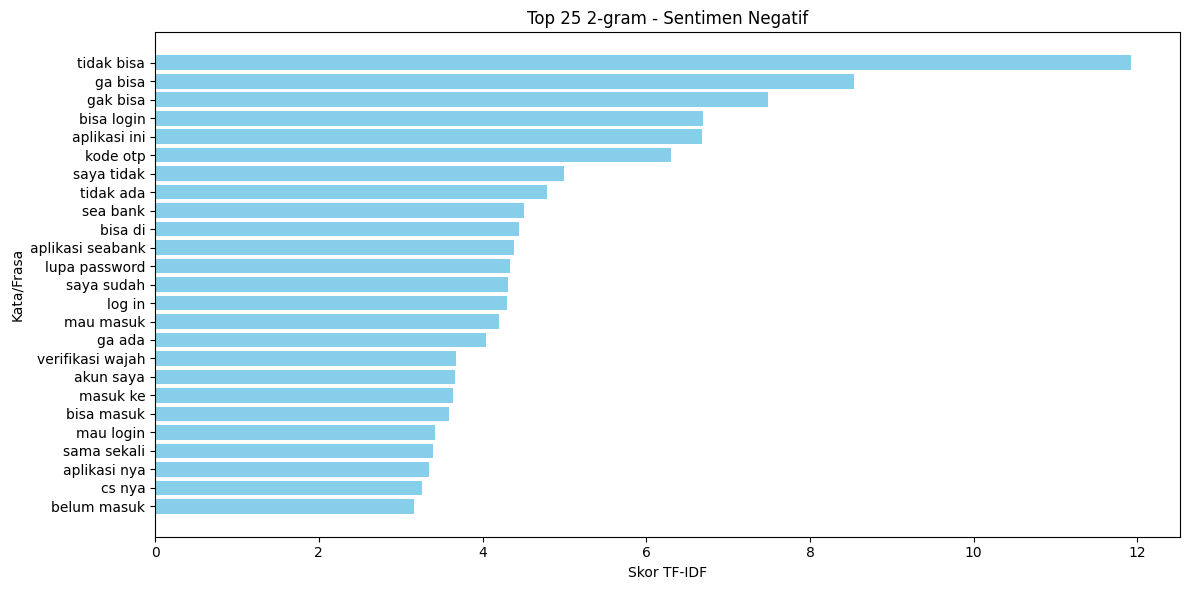

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk ekstrak dan tampilkan grafik bar n-gram per sentimen
def plot_top_ngrams(corpus, ngram_range=(1,1), top_k=20, sentiment_label='Positif'):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=3000)
    X = vectorizer.fit_transform(corpus)
    vocab = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1
    score_dict = dict(zip(vocab, tfidf_scores))
    sorted_scores = sorted(score_dict.items(), key=lambda x: x[1], reverse=True)[:top_k]

    # DataFrame untuk grafik
    df_plot = pd.DataFrame(sorted_scores, columns=['ngram', 'score'])
    df_plot = df_plot.sort_values(by='score', ascending=True)

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    plt.barh(df_plot['ngram'], df_plot['score'], color='skyblue')
    n_text = f"{ngram_range[0]}-gram"
    plt.title(f'Top {top_k} {n_text} - Sentimen {sentiment_label}')
    plt.xlabel('Skor TF-IDF')
    plt.ylabel('Kata/Frasa')
    plt.tight_layout()
    plt.show()

# Ambil teks dari clean_df berdasarkan label sentimen
text_pos = clean_df[clean_df['polarity'] == 'positive']['text_clean'].astype(str)
text_neg = clean_df[clean_df['polarity'] == 'negative']['text_clean'].astype(str)

# ===== Plot untuk N=1 (unigram) =====
plot_top_ngrams(text_pos, ngram_range=(1, 1), top_k=25, sentiment_label='Positif')
plot_top_ngrams(text_neg, ngram_range=(1, 1), top_k=25, sentiment_label='Negatif')

# ===== Plot untuk N=2 (bigram) =====
plot_top_ngrams(text_pos, ngram_range=(2, 2), top_k=25, sentiment_label='Positif')
plot_top_ngrams(text_neg, ngram_range=(2, 2), top_k=25, sentiment_label='Negatif')



=== Naive Bayes ===


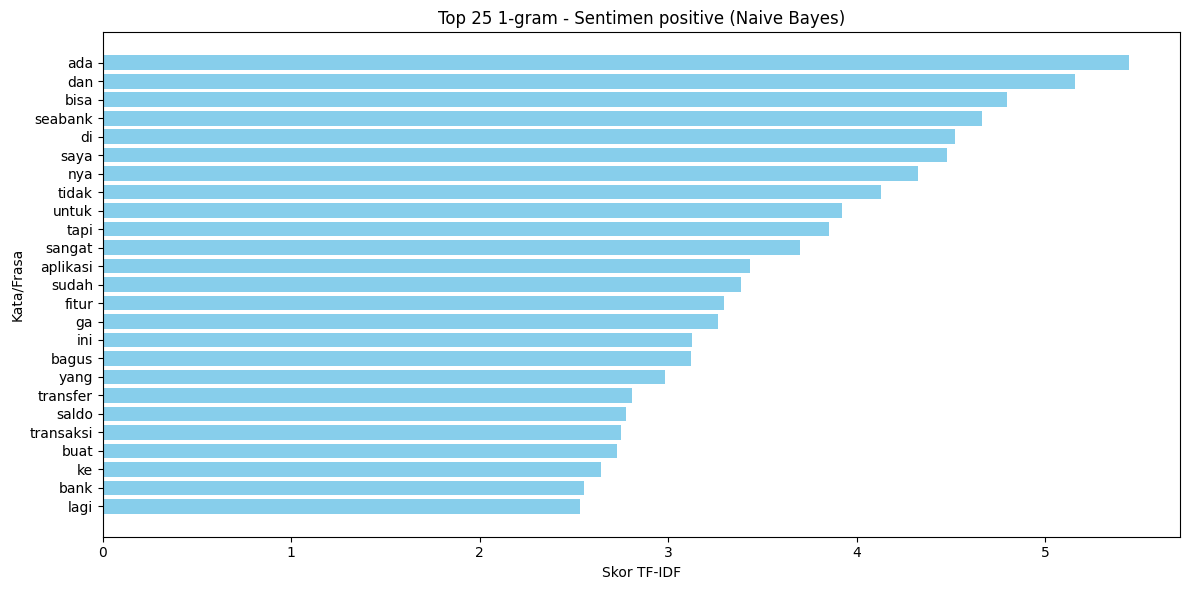

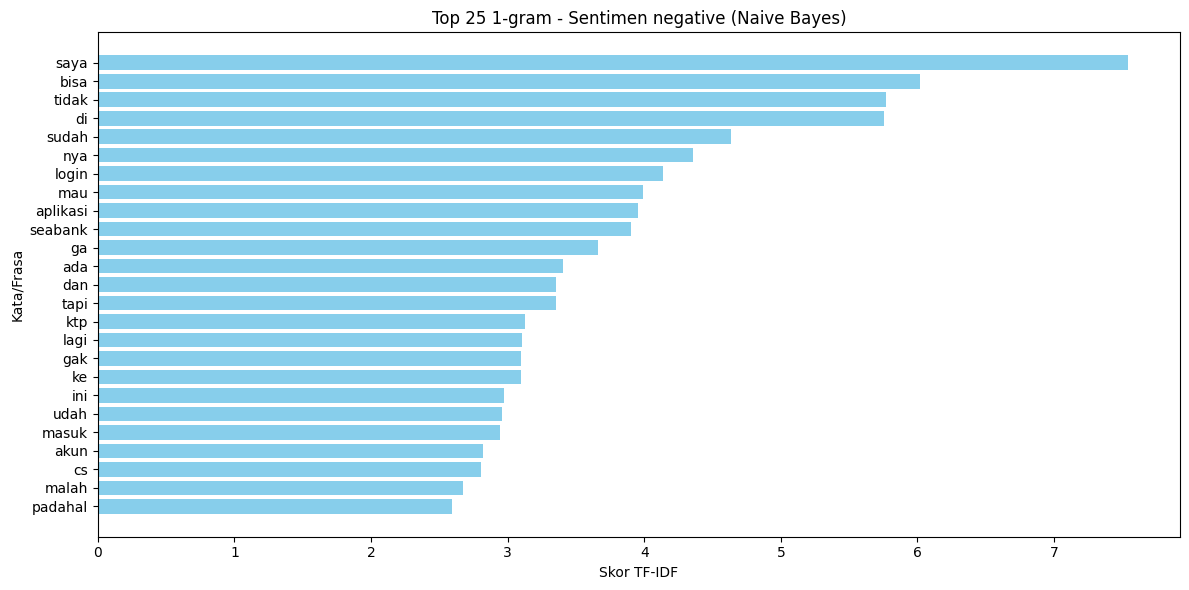

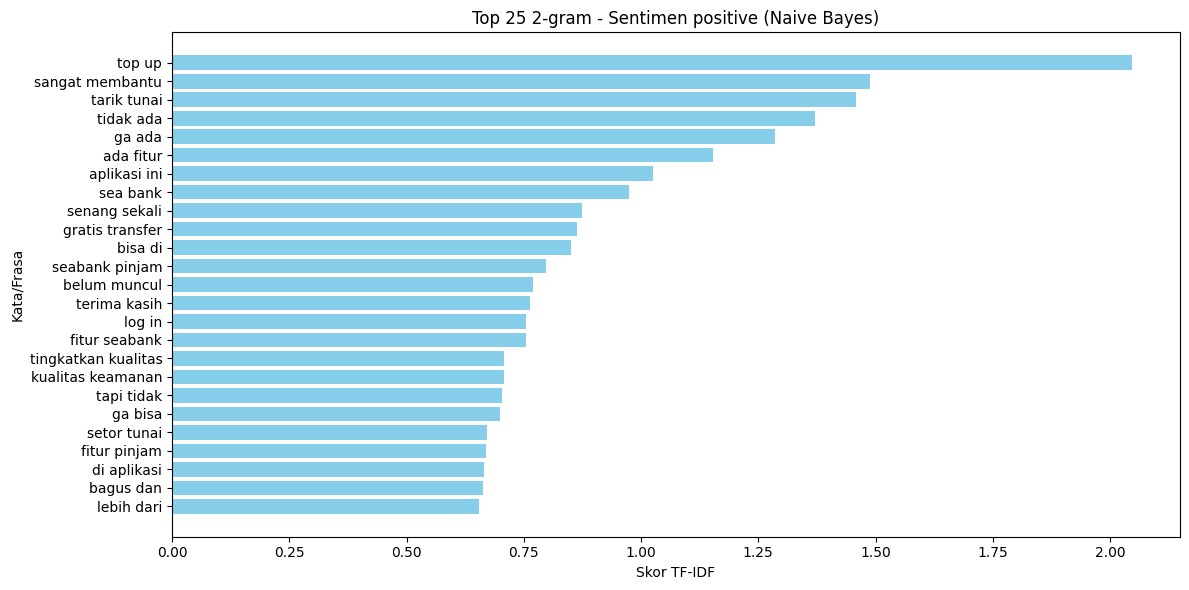

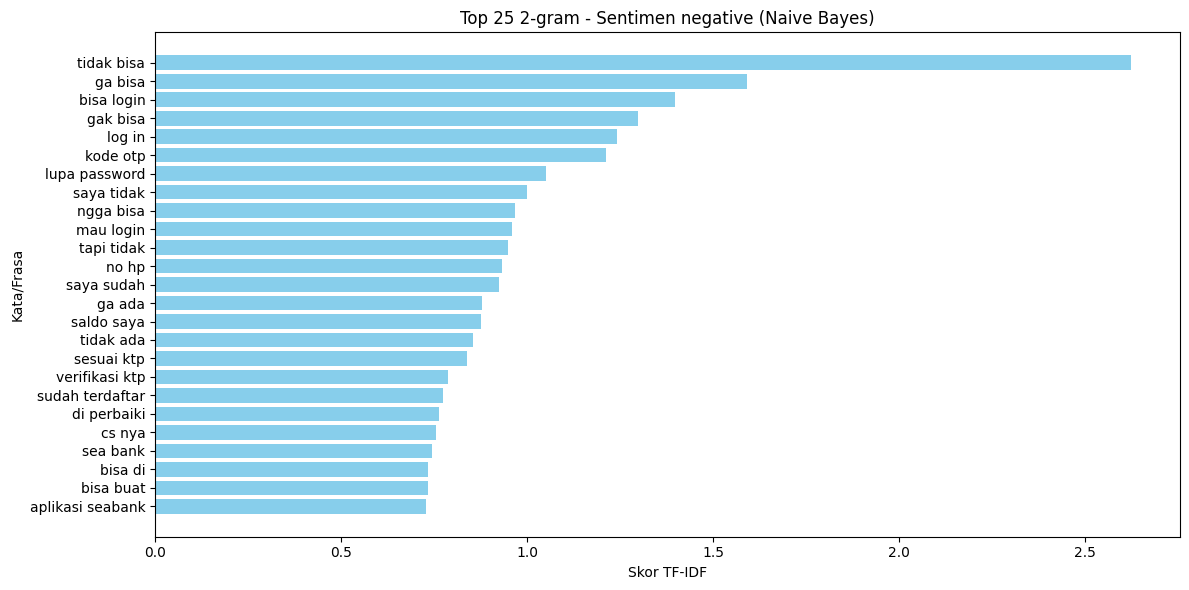


=== SVM ===


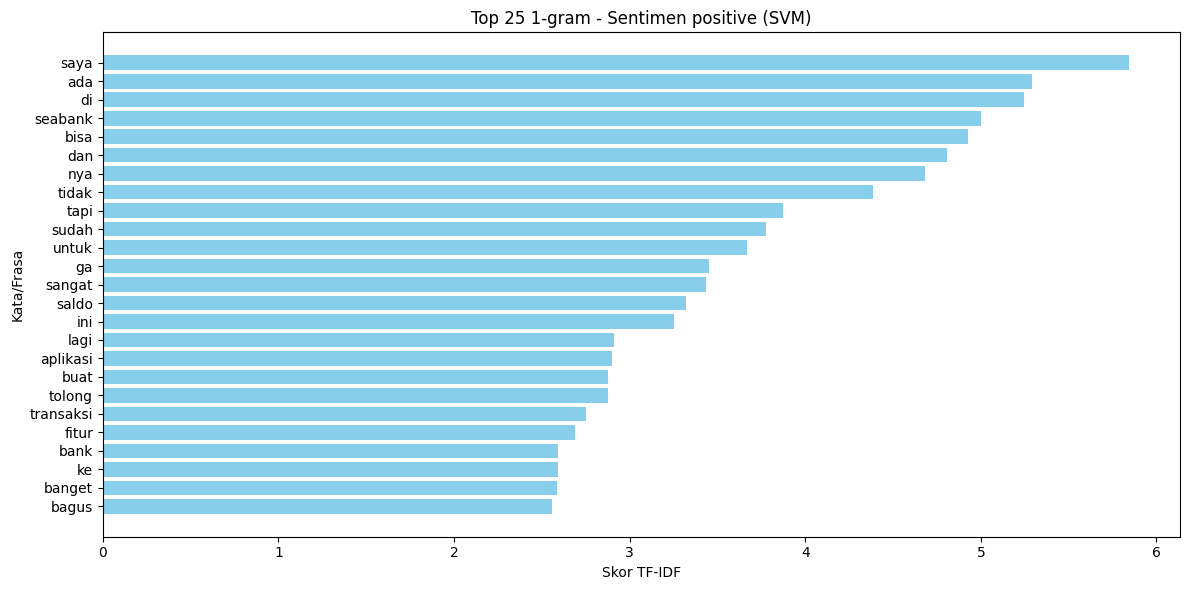

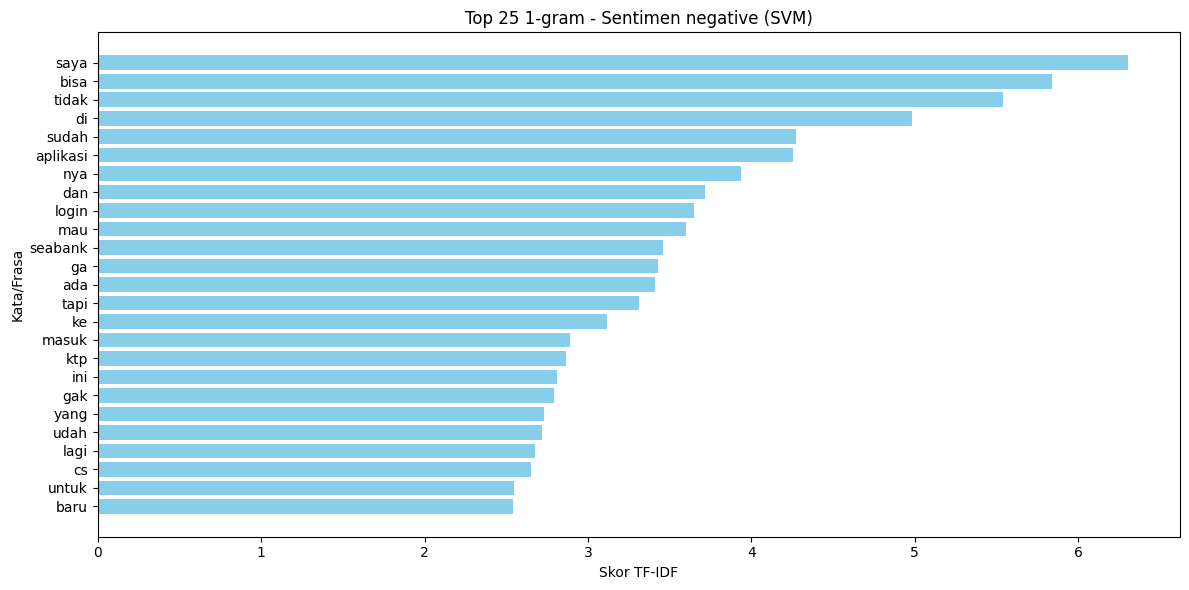

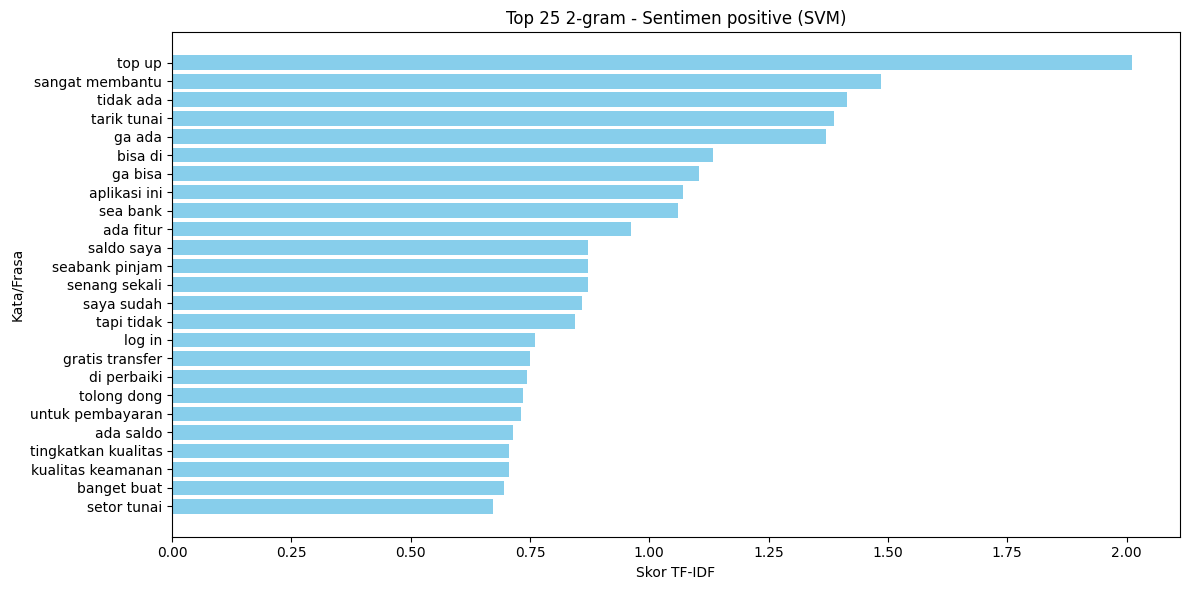

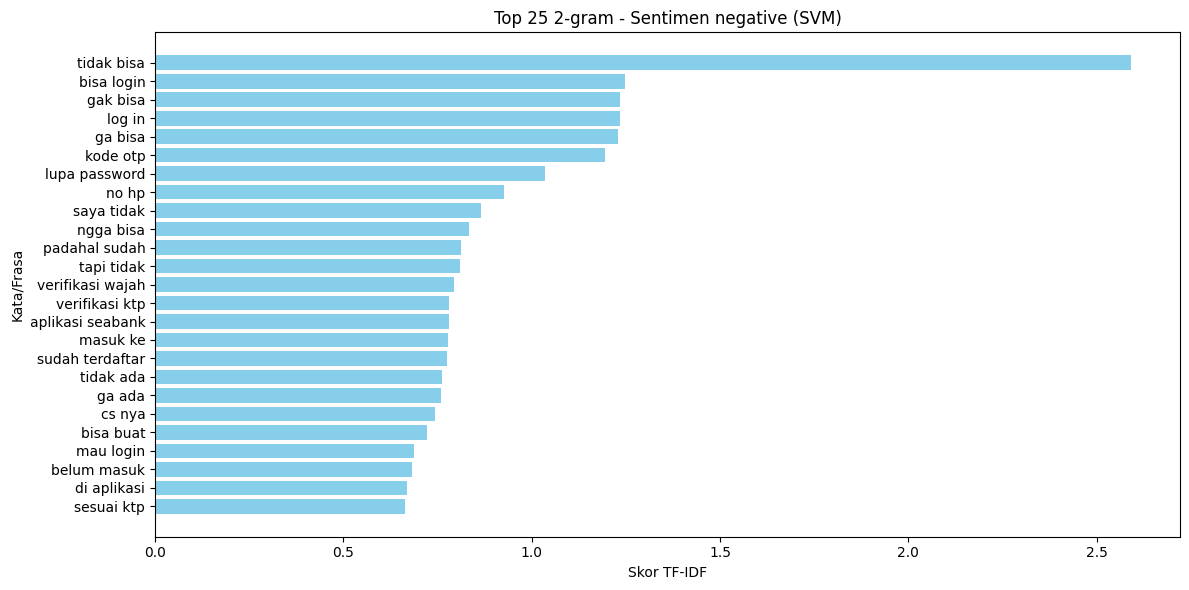


=== KNN ===


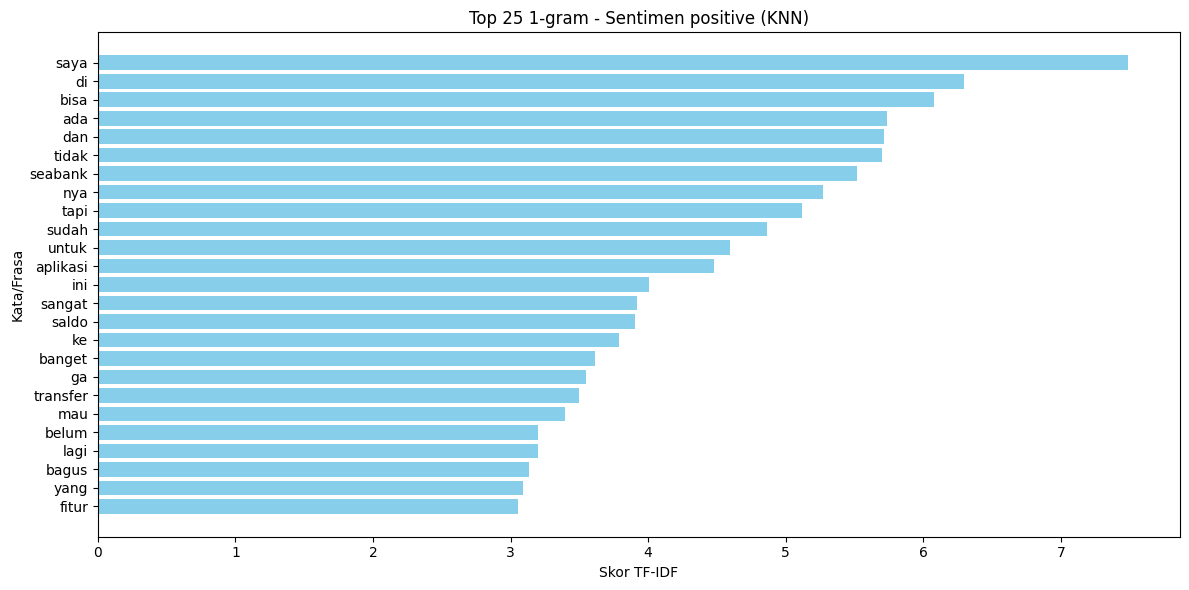

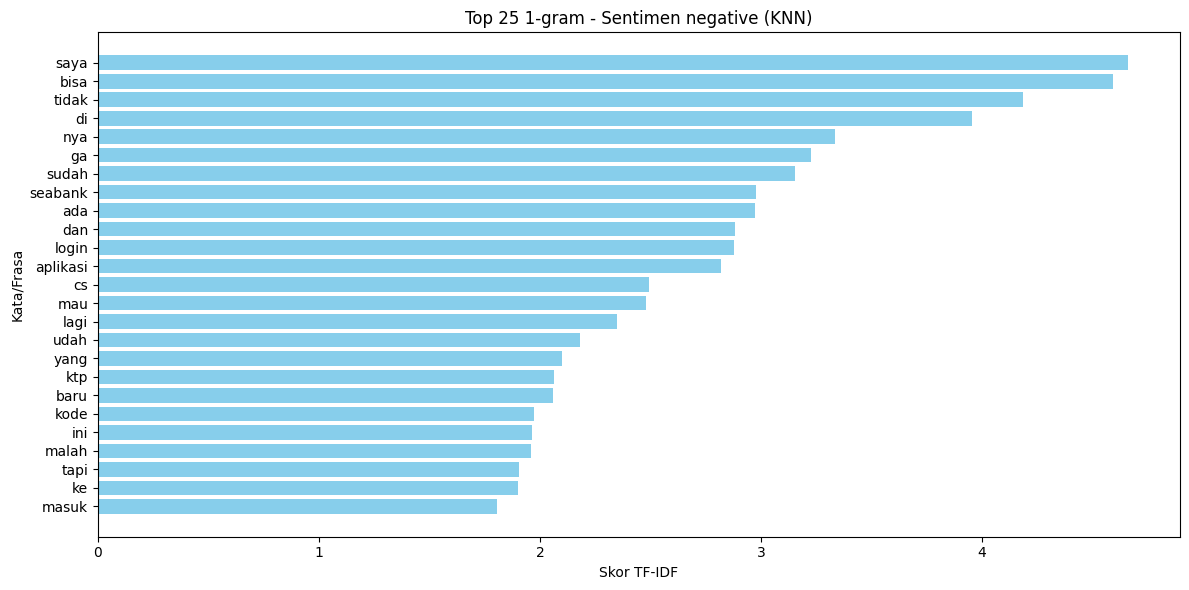

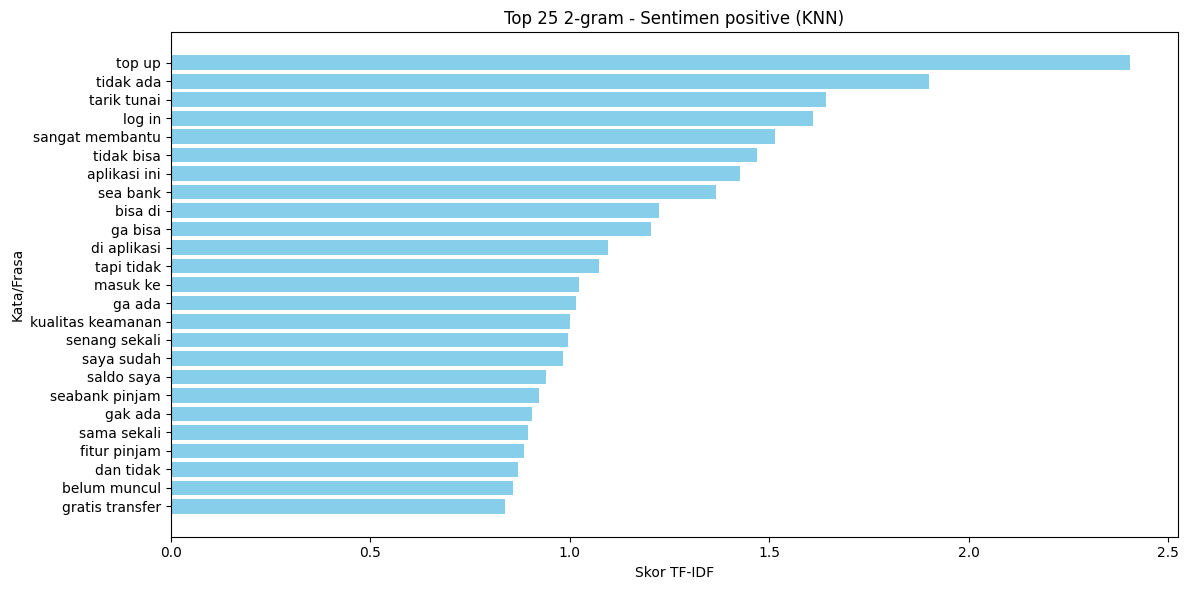

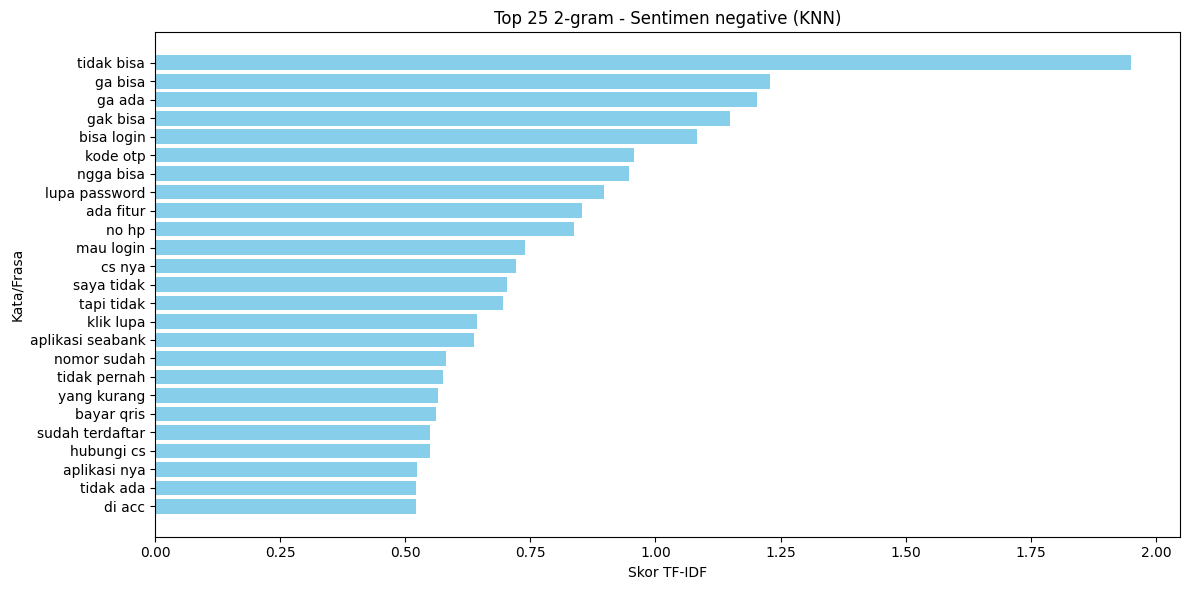


=== Decision Tree ===


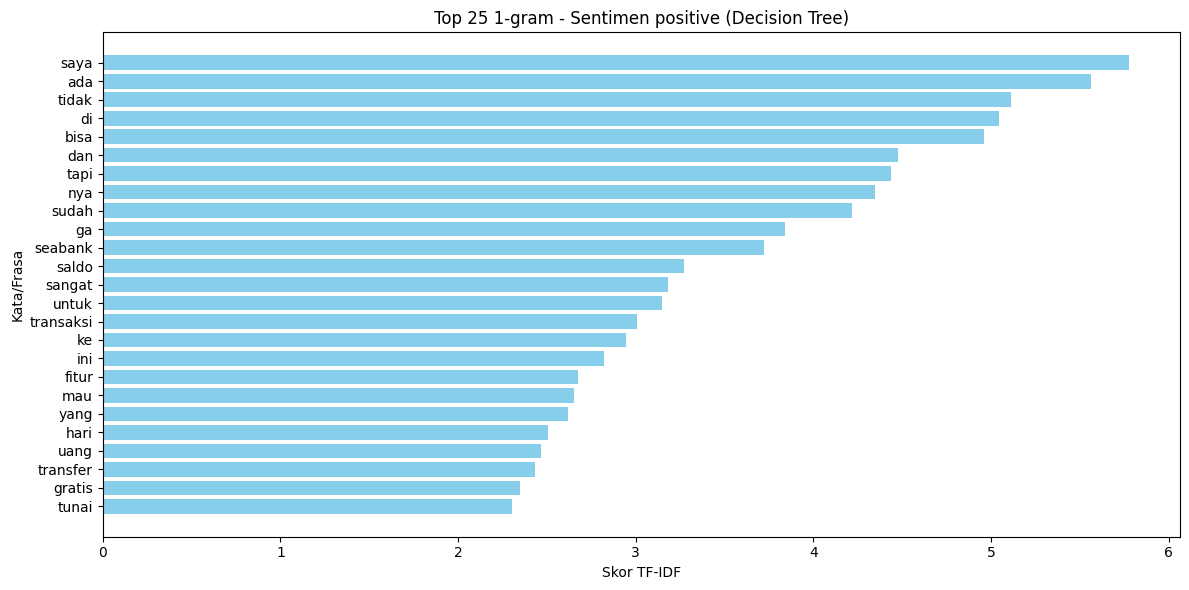

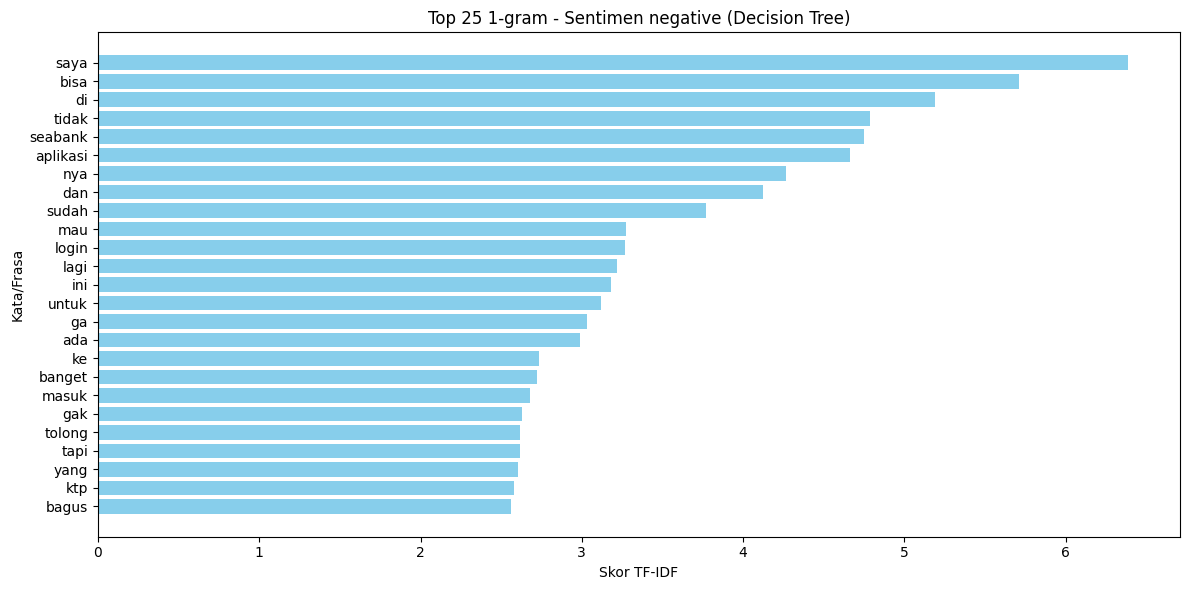

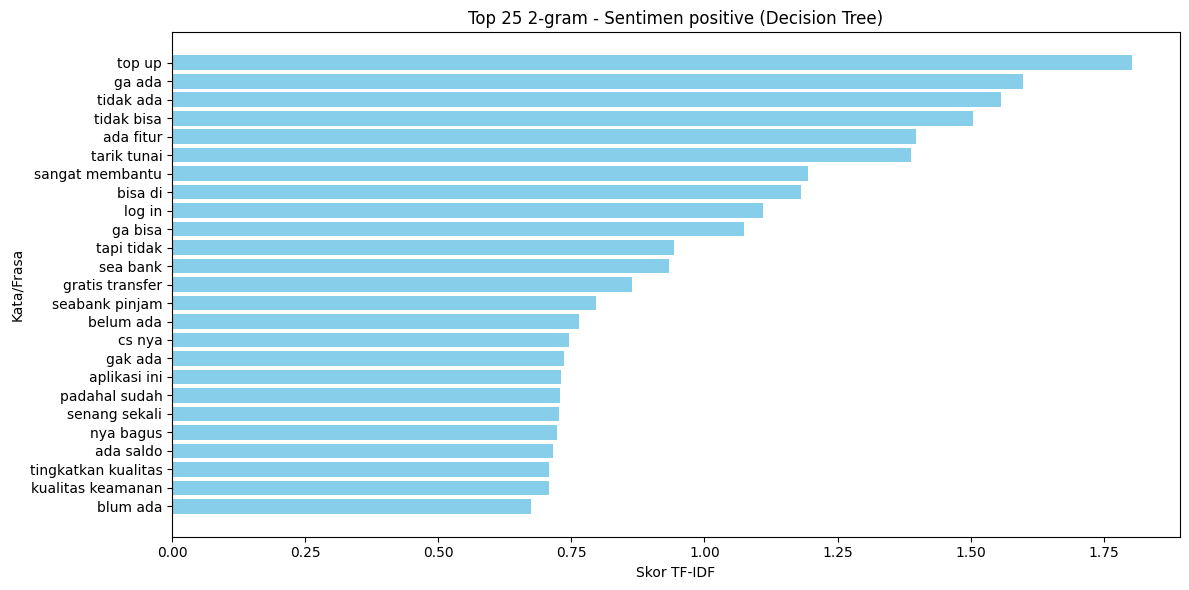

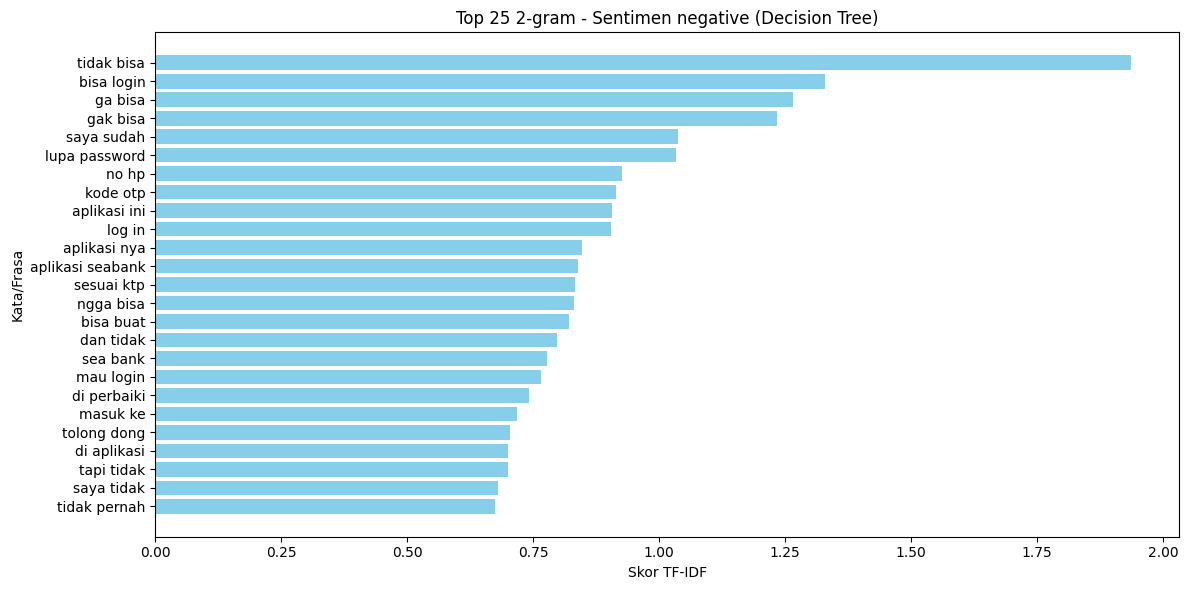

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# === Fungsi: Menampilkan grafik n-gram ===
def plot_top_ngrams(corpus, ngram_range=(1, 1), top_k=20, sentiment_label='Positif'):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=3000)
    X = vectorizer.fit_transform(corpus)
    vocab = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1
    score_dict = dict(zip(vocab, tfidf_scores))
    sorted_scores = sorted(score_dict.items(), key=lambda x: x[1], reverse=True)[:top_k]

    df_plot = pd.DataFrame(sorted_scores, columns=['ngram', 'score'])
    df_plot = df_plot.sort_values(by='score', ascending=True)

    plt.figure(figsize=(12, 6))
    plt.barh(df_plot['ngram'], df_plot['score'], color='skyblue')
    n_text = f"{ngram_range[0]}-gram"
    plt.title(f'Top {top_k} {n_text} - Sentimen {sentiment_label}')
    plt.xlabel('Skor TF-IDF')
    plt.ylabel('Kata/Frasa')
    plt.tight_layout()
    plt.show()

# === Inisialisasi Model ===
models = {
    'Naive Bayes': BernoulliNB(),
    'SVM': LinearSVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# === Vektorisasi dan Split Data ===
vec = TfidfVectorizer(ngram_range=(1, 2), max_features=3000)
X_vec = vec.fit_transform(clean_df['text_clean'])
y = clean_df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Ambil teks asli dari X_test menggunakan index label
# Use the original index of y_test to select rows from the original clean_df
test_texts = clean_df.loc[y_test.index, 'text_clean'].values

# === Looping Setiap Model dan N-Gram ===
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")
    if model_name in ['Naive Bayes', 'KNN', 'Decision Tree']:
        # Ensure the data is dense for models that require it
        if hasattr(X_train, 'toarray'):
            X_train_fitted = X_train.toarray()
        else:
            X_train_fitted = X_train

        if hasattr(X_test, 'toarray'):
            X_test_predicted = X_test.toarray()
        else:
            X_test_predicted = X_test

        model.fit(X_train_fitted, y_train)
        y_pred = model.predict(X_test_predicted)
    else:
        # SVM can handle sparse matrices
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    df_pred = pd.DataFrame({'text': test_texts, 'pred': y_pred})

    for n in [1, 2]:
        for label in ['positive', 'negative']:
            # Filter corpus based on prediction label
            corpus = df_pred[df_pred['pred'] == label]['text']
            if not corpus.empty:
                plot_top_ngrams(corpus, ngram_range=(n, n), top_k=25, sentiment_label=f'{label} ({model_name})')

Berdasarkan hasil evaluasi akurasi dari keempat model klasifikasi (Naive Bayes, SVM, KNN, dan Decision Tree), terlihat bahwa penggunaan unigram (n-gram = 1) memberikan performa yang lebih baik dibandingkan dengan bigram (n-gram = 2). Model SVM menunjukkan akurasi tertinggi pada unigram dengan nilai 0.7434, diikuti oleh Naive Bayes dengan 0.6903. Sebaliknya, saat menggunakan bigram, performa semua model mengalami penurunan, dengan SVM turun menjadi 0.6460 dan Naive Bayes menjadi 0.6549. Model KNN dan Decision Tree menunjukkan hasil yang cukup rendah di kedua pendekatan, namun penurunan paling signifikan juga terlihat saat beralih ke bigram. Hal ini menunjukkan bahwa penggunaan unigram lebih efektif dalam menangkap karakteristik kata-kata kunci dalam data ulasan berbahasa Indonesia, dibandingkan dengan bigram yang mungkin menghasilkan kombinasi kata kurang umum atau tidak relevan. Dengan demikian, pemrosesan teks dengan n-gram = 1 lebih direkomendasikan untuk tugas klasifikasi sentimen pada data ini.


=== Naive Bayes ===
Akurasi: 0.9111
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


=== SVM ===
Akurasi: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== KNN ===
Akurasi: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.0

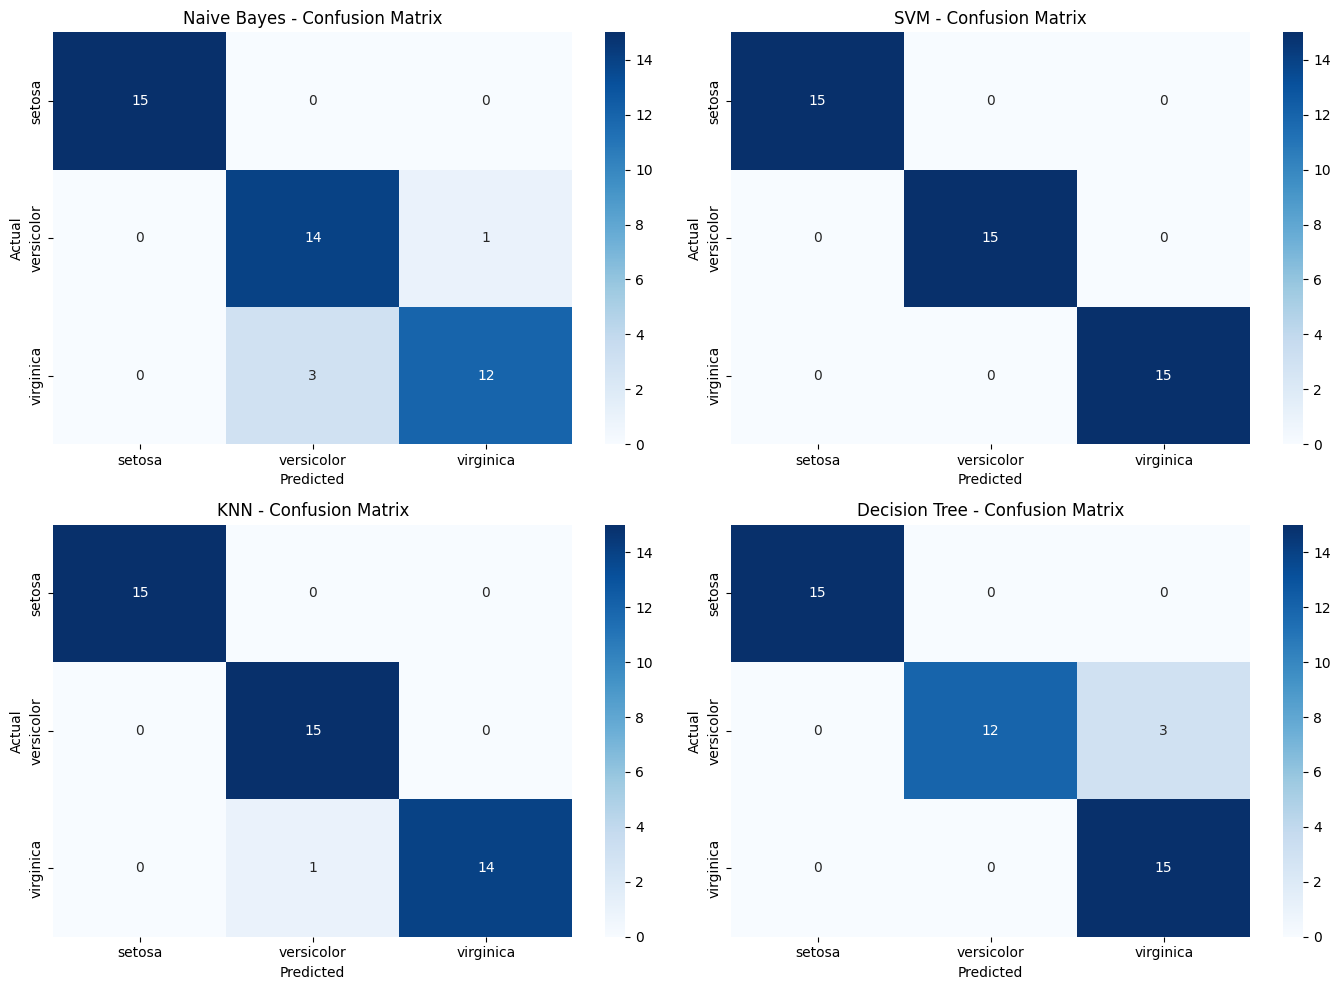

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Inisialisasi model
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear'),  # ganti ke linear agar hasil lebih stabil
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# 4. Visualisasi Confusion Matrix + Laporan
plt.figure(figsize=(14, 10))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot heatmap
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Cetak hasil evaluasi
    print(f"\n=== {name} ===")
    print("Akurasi:", round(accuracy_score(y_test, y_pred), 4))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

plt.tight_layout()
plt.show()


Untuk mengevaluasi performa masing-masing model dalam mengklasifikasikan sentimen pengguna, digunakan confusion matrix yang menggambarkan prediksi terhadap tiga kategori (misalnya: positif, netral, dan negatif). Berdasarkan hasil visualisasi, model SVM menunjukkan performa terbaik, dengan klasifikasi yang sempurna (akurasi 100%) tanpa kesalahan pada setiap kelas, mencerminkan kemampuan yang sangat baik dalam membedakan data antar kategori.
Model KNN juga memiliki kinerja tinggi dengan akurasi sebesar 97.78%. Hanya terjadi satu kesalahan klasifikasi, menunjukkan bahwa model ini cukup andal, meskipun sedikit lebih sensitif terhadap data yang mirip antar kelas. Decision Tree mencatat akurasi 93.33%, dengan beberapa kesalahan klasifikasi pada label versicolor, yang menunjukkan bahwa model ini cukup
baik, namun cenderung overfitting jika tidak diatur dengan optimal. Sementara itu, Naive Bayes memperoleh akurasi 91.11%. Walaupun cukup akurat, model ini menunjukkan beberapa kesalahan pada kelas virginica, akibat asumsi independensi antar fitur yang tidak selalu cocok dalam data nyata seperti teks atau ulasan. Secara keseluruhan, keempat algoritma memiliki performa yang cukup baik, namun SVM menjadi yang paling direkomendasikan karena kemampuannya dalam menghasilkan klasifikasi yang akurat dan stabil. Evaluasi ini diperkuat oleh metrik tambahan seperti precision, recall, dan F1-score yang tinggi, yang mencerminkan efektivitas model dalam mengidentifikasi sentimen secara konsisten.
